## Import
The following code imports the necessary code to run the code in the rest of this Colaboratory.

In [104]:
import os
import zipfile
import random
import shutil
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from shutil import copyfile
import pickle as pkl
import visualkeras as vk
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score

%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16, InceptionV3, Xception
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D, AveragePooling2D, BatchNormalization, Input
from tensorflow.keras import layers, Model, Sequential, regularizers, optimizers, callbacks, metrics
from keras.models import Model, load_model

In [2]:
print(tf.__version__)

2.18.0


## Split Dataset to Train, Test and Validation

In [4]:
# def make_dir(PATH):
#   if not os.path.exists(PATH):
#       os.mkdir(PATH)
#       return PATH
#   else:
#     shutil.rmtree(PATH)
#     os.mkdir(PATH)
#     return PATH

In [5]:
# try:
#     base_dir = 'tmp'
#     fruit_dir = make_dir(os.path.join(base_dir, 'fruit-dataset'))
    
#     train_dir = make_dir(os.path.join(fruit_dir, 'train'))
#     validation_dir = make_dir(os.path.join(fruit_dir, 'val'))
#     test_dir = make_dir(os.path.join(fruit_dir, 'test'))
#     preview_dir = make_dir(os.path.join(fruit_dir, 'preview'))

#     train_fresh_dir = make_dir(os.path.join(train_dir, 'Fresh Fruit'))
#     train_rotten_dir = make_dir(os.path.join(train_dir, 'Rotten Fruit'))

#     validation_fresh_dir = make_dir(os.path.join(validation_dir, 'Fresh Fruit'))
#     validation_rotten_dir = make_dir(os.path.join(validation_dir, 'Rotten Fruit'))

#     test_fresh_dir = make_dir(os.path.join(test_dir, 'Fresh Fruit'))
#     test_rotten_dir = make_dir(os.path.join(test_dir, 'Rotten Fruit'))

# except OSError:
#     pass

In [6]:
# from PIL import Image

# def split_data(SOURCE='', TRAINING='', VALIDATION='', SPLIT_SIZE=0):
#   data = os.listdir(SOURCE)
#   random_data = random.sample(data, len(data))

#   train_size = len(data)*SPLIT_SIZE

#   for i, filename in enumerate(random_data):
#     filepath = os.path.join(SOURCE, filename)
#     if os.path.getsize(filepath) > 0:
#       if i < train_size:
#         copyfile(filepath, os.path.join(TRAINING, filename))
#         # img = Image.open(os.path.join(TRAINING, filename)).convert('L')
#         # img.save(os.path.join(TRAINING, filename))
#       else:
#         copyfile(filepath, os.path.join(VALIDATION, filename))
#         # img = Image.open(os.path.join(VALIDATION, filename)).convert('L')
#         # img.save(os.path.join(VALIDATION, filename))

In [7]:

# dataset_train_dir = 'tmp/dataset/Train'
# dataset_test_dir = 'tmp/dataset/Test'

# def validate_path(path):
#     if os.path.exists(path):
#         if os.path.isdir(path):
#             print(f"Path is valid and is a directory: {path}")
#         else:
#             print(f"Path exists but is not a directory: {path}")
#     else:
#         print(f"Path does not exist: {path}")

# # Validate the dataset paths
# validate_path(dataset_train_dir)
# validate_path(dataset_test_dir)

Path is valid and is a directory: tmp/dataset/Train
Path is valid and is a directory: tmp/dataset/Test


In [8]:


# #For later uses
# BATCH_SIZE = 32
# TARGET_SIZE = (150, 150)
# COLOR_MODE = "rgb"

# #Train
# fapples_train_dir = os.path.join(dataset_train_dir, 'freshapples')
# fbananas_train_dir = os.path.join(dataset_train_dir, 'freshbanana')
# foranges_train_dir = os.path.join(dataset_train_dir, 'freshoranges')
# fpotato_train_dir = os.path.join(dataset_train_dir, 'freshpotato')
# fcucumber_train_dir = os.path.join(dataset_train_dir, 'freshcucumber')
# fokra_train_dir = os.path.join(dataset_train_dir, 'freshokra')
# ftomato_train_dir = os.path.join(dataset_train_dir, 'freshtomato')
# fcapsicum_train_dir = os.path.join(dataset_train_dir, 'freshcapsicum')
# fbittergroud_train_dir = os.path.join(dataset_train_dir, 'freshbittergroud')



# rapples_train_dir = os.path.join(dataset_train_dir, 'rottenapples')
# rbananas_train_dir = os.path.join(dataset_train_dir, 'rottenbanana')
# roranges_train_dir = os.path.join(dataset_train_dir, 'rottenoranges')
# rpotato_train_dir = os.path.join(dataset_train_dir, 'rottenpotato')
# rcucumber_train_dir = os.path.join(dataset_train_dir, 'rottencucumber')
# rokra_train_dir = os.path.join(dataset_train_dir, 'rottenokra')
# rtomato_train_dir = os.path.join(dataset_train_dir, 'rottentomato')
# rcapsicum_train_dir = os.path.join(dataset_train_dir, 'rottencapsicum')
# rbittergroud_train_dir = os.path.join(dataset_train_dir, 'rottenbittergroud')

# #Test
# fapples_test_dir = os.path.join(dataset_test_dir, 'freshapples')
# fbananas_test_dir = os.path.join(dataset_test_dir, 'freshbanana')
# foranges_test_dir = os.path.join(dataset_test_dir, 'freshoranges')
# fpotato_test_dir = os.path.join(dataset_test_dir, 'freshpatato')
# fcucumber_test_dir = os.path.join(dataset_test_dir, 'freshcucumber')
# fokra_test_dir = os.path.join(dataset_test_dir, 'freshokra')
# ftomato_test_dir = os.path.join(dataset_test_dir, 'freshtamto')

# rapples_test_dir = os.path.join(dataset_test_dir, 'rottenapples')
# rbananas_test_dir = os.path.join(dataset_test_dir, 'rottenbanana')
# roranges_test_dir = os.path.join(dataset_test_dir, 'rottenoranges')
# rpotato_test_dir = os.path.join(dataset_test_dir, 'rottenpatato')
# rcucumber_test_dir = os.path.join(dataset_test_dir, 'rottencucumber')
# rokra_test_dir = os.path.join(dataset_test_dir, 'rottenokra')
# rtomato_test_dir = os.path.join(dataset_test_dir, 'rottentamto')

# #Display train
# print('fapples_train images = ', len(os.listdir(fapples_train_dir)))
# print('fbananas_train images = ', len(os.listdir(fbananas_train_dir)))
# print('foranges_train images = ', len(os.listdir(foranges_train_dir)))
# print('fpotato_train images = ', len(os.listdir(fpotato_train_dir)))
# print('fcucumber_train images = ', len(os.listdir(fcucumber_train_dir)))
# print('fokra_train images = ', len(os.listdir(fokra_train_dir)))
# print('ftomato_train images = ', len(os.listdir(ftomato_train_dir)))
# print('fcapsicum_train images = ', len(os.listdir(fcapsicum_train_dir)))
# print('fbittergroud_train images = ', len(os.listdir(fbittergroud_train_dir)))

# print('rapples_train images = ', len(os.listdir(rapples_train_dir)))
# print('rbananas_train images = ', len(os.listdir(rbananas_train_dir)))
# print('roranges_train images = ', len(os.listdir(roranges_train_dir)))
# print('rpotato_train images = ', len(os.listdir(rpotato_train_dir)))
# print('rcucumber_train images = ', len(os.listdir(rcucumber_train_dir)))
# print('rokra_train images = ', len(os.listdir(rokra_train_dir)))
# print('rtomato_train images = ', len(os.listdir(rtomato_train_dir)))
# print('rcapsicum_train images = ', len(os.listdir(rcapsicum_train_dir)))
# print('rbittergroud_train images = ', len(os.listdir(rbittergroud_train_dir)))

# print()

# #Display test
# print('fapples_test images = ', len(os.listdir(fapples_test_dir)))
# print('fbananas_test images = ', len(os.listdir(fbananas_test_dir)))
# print('foranges_test images = ', len(os.listdir(foranges_test_dir)))
# print('fpotato_train images = ', len(os.listdir(fpotato_test_dir)))
# print('fcucumber_train images = ', len(os.listdir(fcucumber_test_dir)))
# print('fokra_train images = ', len(os.listdir(fokra_test_dir)))
# print('ftomato_train images = ', len(os.listdir(ftomato_test_dir)))

# print('rapples_test images = ', len(os.listdir(rapples_test_dir)))
# print('rbananas_test images = ', len(os.listdir(rbananas_test_dir)))
# print('roranges_test images = ', len(os.listdir(roranges_test_dir)))
# print('rpotato_train images = ', len(os.listdir(rpotato_test_dir)))
# print('rcucumber_train images = ', len(os.listdir(rcucumber_test_dir)))
# print('rokra_train images = ', len(os.listdir(rokra_test_dir)))
# print('rtomato_train images = ', len(os.listdir(rtomato_test_dir)))

fapples_train images =  2424
fbananas_train images =  2468
foranges_train images =  1466
fpotato_train images =  536
fcucumber_train images =  496
fokra_train images =  635
ftomato_train images =  1858
fcapsicum_train images =  990
fbittergroud_train images =  327
rapples_train images =  3248
rbananas_train images =  2932
roranges_train images =  1595
rpotato_train images =  802
rcucumber_train images =  421
rokra_train images =  338
rtomato_train images =  1825
rcapsicum_train images =  901
rbittergroud_train images =  357

fapples_test images =  791
fbananas_test images =  892
foranges_test images =  388
fpotato_train images =  270
fcucumber_train images =  279
fokra_train images =  370
ftomato_train images =  255
rapples_test images =  988
rbananas_test images =  900
roranges_test images =  403
rpotato_train images =  370
rcucumber_train images =  255
rokra_train images =  224
rtomato_train images =  353


In [9]:
# SPLIT_SIZE = 0.67
# split_data(fapples_train_dir, train_fresh_dir, validation_fresh_dir, SPLIT_SIZE)
# split_data(fbananas_train_dir, train_fresh_dir, validation_fresh_dir, SPLIT_SIZE)
# split_data(foranges_train_dir, train_fresh_dir, validation_fresh_dir, SPLIT_SIZE)
# split_data(fpotato_train_dir, train_fresh_dir, validation_fresh_dir, SPLIT_SIZE)
# split_data(fcucumber_train_dir, train_fresh_dir, validation_fresh_dir, SPLIT_SIZE)
# split_data(fokra_train_dir, train_fresh_dir, validation_fresh_dir, SPLIT_SIZE)
# split_data(ftomato_train_dir, train_fresh_dir, validation_fresh_dir, SPLIT_SIZE)
# split_data(fcapsicum_train_dir, train_fresh_dir, validation_fresh_dir, SPLIT_SIZE)
# split_data(fbittergroud_train_dir, train_fresh_dir, validation_fresh_dir, SPLIT_SIZE)


# split_data(rapples_train_dir, train_rotten_dir, validation_rotten_dir, SPLIT_SIZE)
# split_data(rbananas_train_dir, train_rotten_dir, validation_rotten_dir, SPLIT_SIZE)
# split_data(roranges_train_dir, train_rotten_dir, validation_rotten_dir, SPLIT_SIZE)
# split_data(rpotato_train_dir, train_rotten_dir, validation_rotten_dir, SPLIT_SIZE)
# split_data(rcucumber_train_dir, train_rotten_dir, validation_rotten_dir, SPLIT_SIZE)
# split_data(rokra_train_dir, train_rotten_dir, validation_rotten_dir, SPLIT_SIZE)
# split_data(rtomato_train_dir, train_rotten_dir, validation_rotten_dir, SPLIT_SIZE)
# split_data(rcapsicum_train_dir, train_rotten_dir, validation_rotten_dir, SPLIT_SIZE)
# split_data(rbittergroud_train_dir, train_rotten_dir, validation_rotten_dir, SPLIT_SIZE)



# SPLIT_SIZE = 1.0
# split_data(fapples_test_dir, test_fresh_dir, validation_fresh_dir, SPLIT_SIZE)
# split_data(fbananas_test_dir, test_fresh_dir, validation_fresh_dir, SPLIT_SIZE)
# split_data(foranges_test_dir, test_fresh_dir, validation_fresh_dir, SPLIT_SIZE)
# split_data(fpotato_test_dir, test_fresh_dir, validation_fresh_dir, SPLIT_SIZE)
# split_data(fcucumber_test_dir, test_fresh_dir, validation_fresh_dir, SPLIT_SIZE)
# split_data(fokra_test_dir, test_fresh_dir, validation_fresh_dir, SPLIT_SIZE)
# split_data(ftomato_test_dir, test_fresh_dir, validation_fresh_dir, SPLIT_SIZE)


# split_data(rapples_test_dir, test_rotten_dir, validation_rotten_dir, SPLIT_SIZE)
# split_data(rbananas_test_dir, test_rotten_dir, validation_rotten_dir, SPLIT_SIZE)
# split_data(roranges_test_dir, test_rotten_dir, validation_rotten_dir, SPLIT_SIZE)
# split_data(rpotato_test_dir, test_rotten_dir, validation_rotten_dir, SPLIT_SIZE)
# split_data(rcucumber_test_dir, test_rotten_dir, validation_rotten_dir, SPLIT_SIZE)
# split_data(rokra_test_dir, test_rotten_dir, validation_rotten_dir, SPLIT_SIZE)
# split_data(rtomato_test_dir, test_rotten_dir, validation_rotten_dir, SPLIT_SIZE)

In [10]:
print(len(os.listdir('tmp/fruit-dataset/train/Fresh Fruit/')))
print(len(os.listdir('tmp/fruit-dataset/train/Rotten Fruit/')))
print()
print(len(os.listdir('tmp/fruit-dataset/val/Fresh Fruit/')))
print(len(os.listdir('tmp/fruit-dataset/val/Rotten Fruit/')))
print()
print(len(os.listdir('tmp/fruit-dataset/test/Fresh Fruit/')))
print(len(os.listdir('tmp/fruit-dataset/test/Rotten Fruit/')))

7510
8326

3690
4093

3245
3493


In [115]:
classes = []
class_counter = 0
train_path = 'tmp/fruit-dataset/train/'
test_path = 'tmp/fruit-dataset/test/'
for dirname, _, filenames in os.walk(train_path):
    if dirname.endswith('/'):
        continue
    else:
        classes.append({dirname.split('/')[-1]: 0})
    file_count = 0
    for filename in filenames:
        file_count += 1
    classes[class_counter][dirname.split('/')[-1]] = file_count
    class_counter += 1
    
print('{:<15} {:<15}'.format('Class', 'Number of instances'))
print()
for d in classes:
    [(k, v)] = d.items()
    print('{:<15} {:<15}'.format(k, v))

Class           Number of instances

Fresh Fruit     7510           
Rotten Fruit    8326           


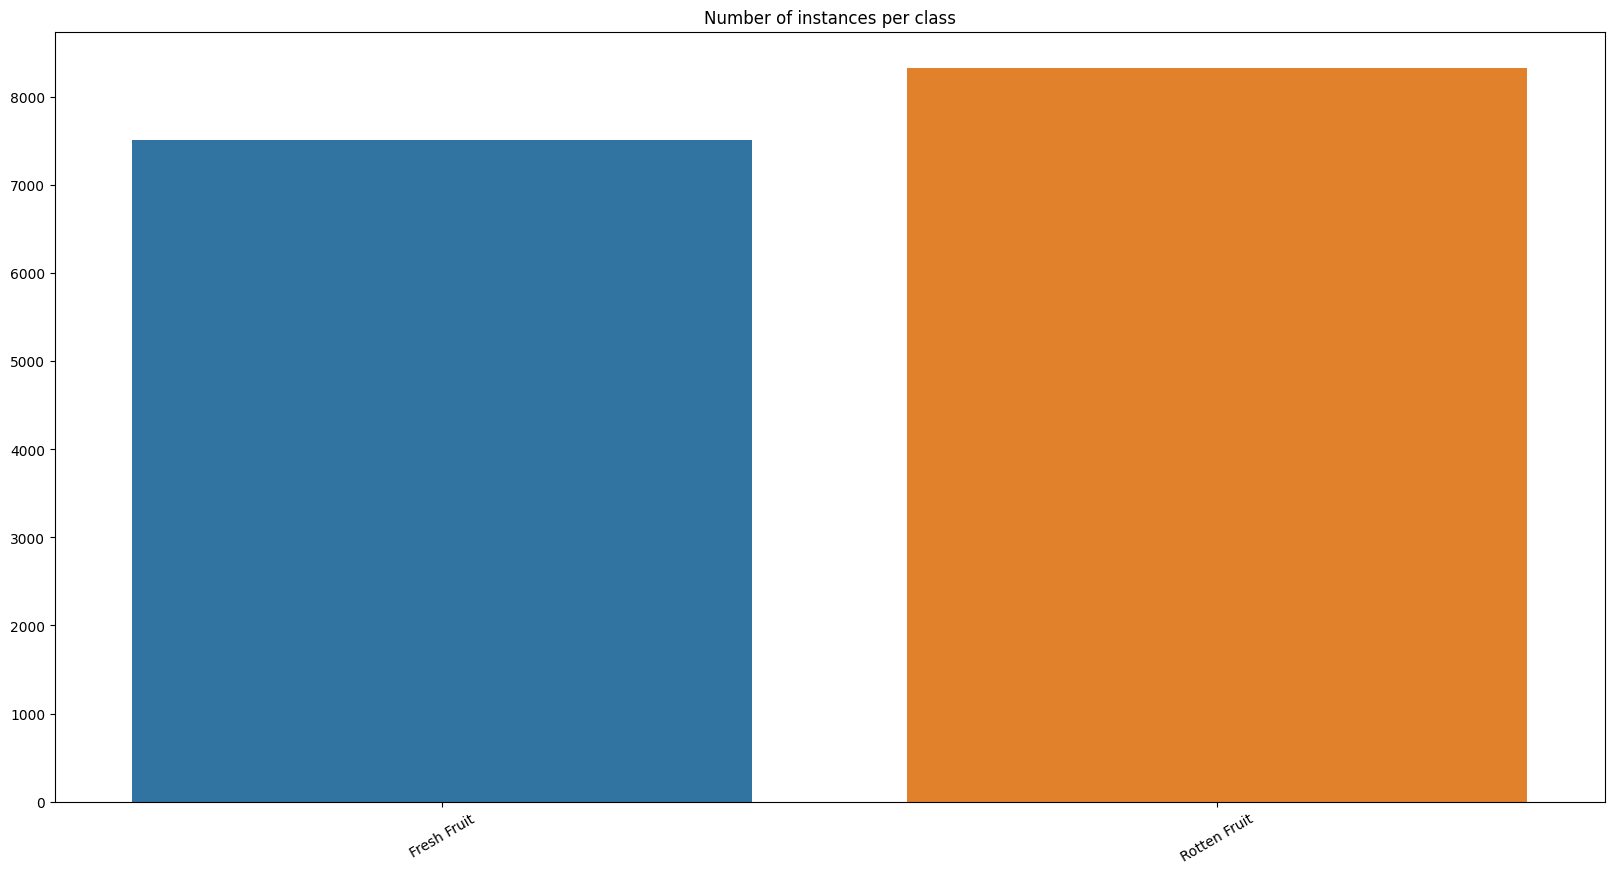

In [116]:
counts = []
labels = []
for d in classes:
    [(k, v)] = d.items()
    labels.append(k)
    counts.append(v)

plt.figure(figsize=(20, 10))
sns.barplot(x=labels, y=counts, hue=labels)
plt.xticks(rotation=30)
plt.title('Number of instances per class')
plt.show()

## Augmentation and Preview


In [3]:
base_dir = 'tmp'
fruit_dir = os.path.join(base_dir, 'fruit-dataset')

train_dir = os.path.join(fruit_dir, 'train')
validation_dir = os.path.join(fruit_dir, 'val')
test_dir = os.path.join(fruit_dir, 'test')
preview_dir = os.path.join(fruit_dir, 'preview')

train_fresh_dir = os.path.join(train_dir, 'Fresh Fruit')
train_rotten_dir = os.path.join(train_dir, 'Rotten Fruit')

validation_fresh_dir = os.path.join(validation_dir, 'Fresh Fruit')
validation_rotten_dir = os.path.join(validation_dir, 'Rotten Fruit')

test_fresh_dir = os.path.join(test_dir, 'Fresh Fruit')
test_rotten_dir = os.path.join(test_dir, 'Rotten Fruit')


tmp\fruit-dataset\train\Fresh Fruit\a_f450.png


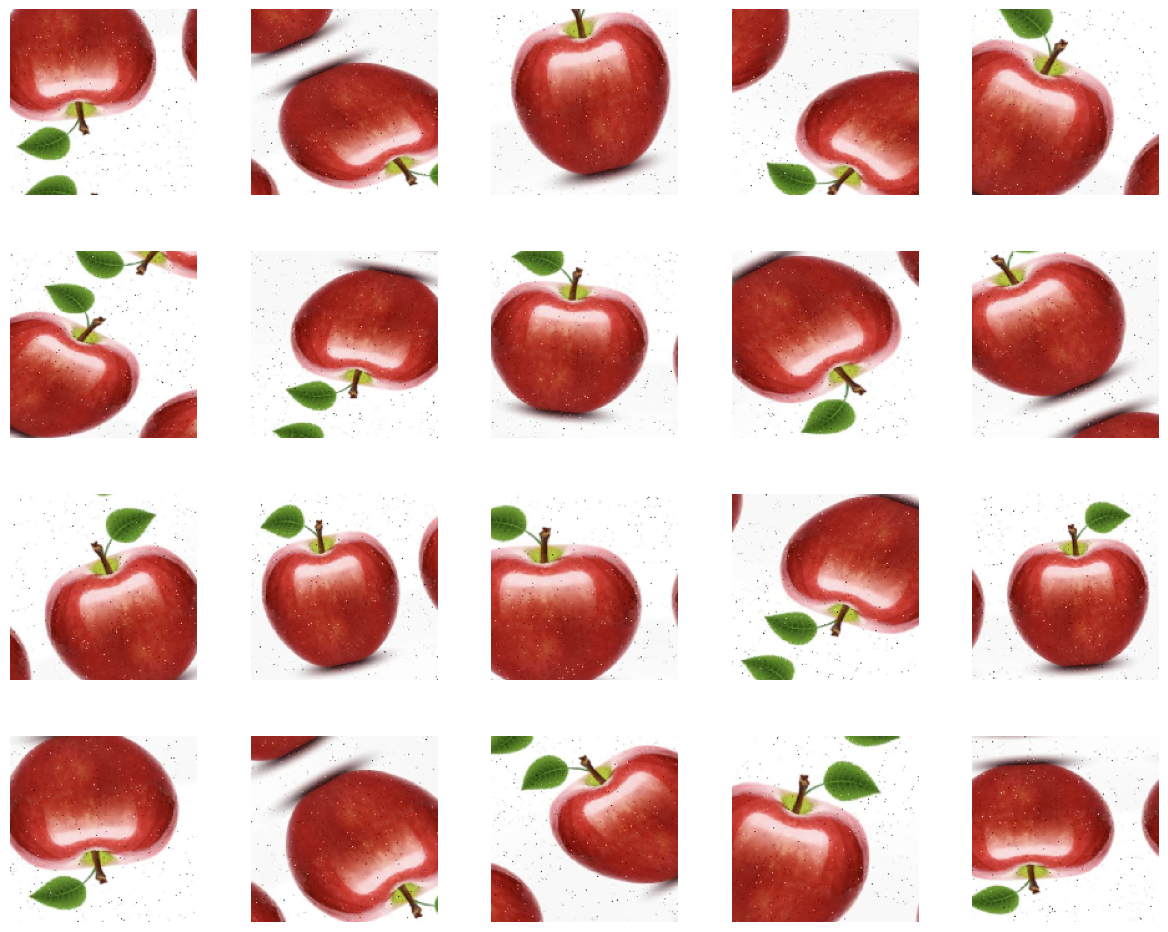

In [114]:
#Use last image for augmentation
path_aug = os.path.join(train_fresh_dir, os.listdir(train_fresh_dir)[306])
print(path_aug)
img_augmentation = image.load_img(path_aug)
x_aug = image.img_to_array(img_augmentation)
x_aug = x_aug.reshape((1,) + x_aug.shape)



train_datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=[0.8, 1.1],
    rotation_range=40,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='reflect'
)

validation_datagen = ImageDataGenerator(
    rescale=1./255
)

# Create augmented images
i = 0
for batch in train_datagen.flow(x_aug, batch_size=1, save_to_dir=preview_dir, save_prefix='fruit', save_format='jpeg'):
    i += 1
    if i >= 20:
        break

preview_img = os.listdir(preview_dir)
grid_size = int(np.ceil(np.sqrt(len(preview_img))))

plt.figure(figsize=(15, 15))
for n in range(len(preview_img)):
    plt.subplot(grid_size, grid_size, n + 1)  # Create a grid of images
    plt.subplots_adjust(hspace=0.3)
    plt.imshow(image.load_img(os.path.join(preview_dir, preview_img[n]),
                              color_mode="rgb",
                              target_size=(150, 150),
                              interpolation="nearest"))
    plt.axis('off')
plt.show()

for fn in preview_img:
  os.system(f'rm {os.path.join(preview_dir, fn)}')


## Image Data Generator

In [5]:
BATCH_SIZE = 32
TARGET_SIZE = (150, 150)
COLOR_MODE = "rgb"
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=TARGET_SIZE,
                                                    batch_size=BATCH_SIZE,
                                                    color_mode=COLOR_MODE,
                                                    class_mode='binary')

validation_generator = train_datagen.flow_from_directory(validation_dir,
                                                         target_size=TARGET_SIZE,
                                                         batch_size=BATCH_SIZE,
                                                         color_mode=COLOR_MODE,
                                                         class_mode='binary')

Found 15836 images belonging to 2 classes.
Found 7783 images belonging to 2 classes.


In [6]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size=1,
                                                  target_size=(150, 150),
                                                  shuffle = False,
                                                  class_mode='binary')

filenames = test_generator.filenames
nb_samples = len(filenames)

Found 6738 images belonging to 2 classes.


In [7]:
train_len = 0
for foldername in os.listdir('tmp/fruit-dataset/train'):
    train_len = train_len + len(os.listdir(os.path.join('tmp/fruit-dataset/train',foldername)))

val_len = 0
for foldername in os.listdir('tmp/fruit-dataset/val'):
    val_len = val_len + len(os.listdir(os.path.join('tmp/fruit-dataset/val',foldername)))

print(train_len)
print(val_len)

15836
7783


## Callbacks

In [8]:
class MyCallback(tf.keras.callbacks.Callback):
    def __init__(self, accuracy_threshold=0.98, monitor='accuracy'):
        super(MyCallback, self).__init__()
        self.accuracy_threshold = accuracy_threshold
        self.monitor = monitor

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        monitored_metric = logs.get(self.monitor)
        if monitored_metric is not None and monitored_metric >= self.accuracy_threshold:
            print(f"\nEpoch {epoch + 1}: {self.monitor} reached {monitored_metric:.2%}. Stopping training.")
            self.model.stop_training = True


callbacks = MyCallback(accuracy_threshold=0.98, monitor='val_accuracy')  


## Transfer Learning

### VGG16

#### Basic model

In [41]:
pre_trained_model = VGG16(input_shape=(150, 150, 3), include_top=False, weights='imagenet')


for layer in pre_trained_model.layers[:-5]:
    layer.trainable = False


x = Flatten()(pre_trained_model.output)
x = Dense(1, activation='sigmoid')(x)


######################### Fully Connected Layer ################################

model = Model(pre_trained_model.input, x)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00005),
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

pd.set_option('max_colwidth', None)
layers = [(layer, layer.name, layer.trainable) for layer in pre_trained_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

Layer Type      Layer Name  \
0   <InputLayer name=input_layer_15, built=True>  input_layer_15   
1         <Conv2D name=block1_conv1, built=True>    block1_conv1   
2         <Conv2D name=block1_conv2, built=True>    block1_conv2   
3    <MaxPooling2D name=block1_pool, built=True>     block1_pool   
4         <Conv2D name=block2_conv1, built=True>    block2_conv1   
5         <Conv2D name=block2_conv2, built=True>    block2_conv2   
6    <MaxPooling2D name=block2_pool, built=True>     block2_pool   
7         <Conv2D name=block3_conv1, built=True>    block3_conv1   
8         <Conv2D name=block3_conv2, built=True>    block3_conv2   
9         <Conv2D name=block3_conv3, built=True>    block3_conv3   
10   <MaxPooling2D name=block3_pool, built=True>     block3_pool   
11        <Conv2D name=block4_conv1, built=True>    block4_conv1   
12        <Conv2D name=block4_conv2, built=True>    block4_conv2   
13        <Conv2D name=block4_conv3, built=True>    block4_conv3   
14   <MaxPooling2D name=block4_pool, built=True>     block4_pool   
15        <Conv2D name=block5_conv1, built=True>    block5_conv1   
16        <Conv2D name=block5_conv2, built=True>    block5_conv2   
17        <Conv2D name=block5_conv3, built=True>    block5_conv3   
18   <MaxPooling2D name=block5_pool, built=True>     block5_pool   

    Layer Trainable  
0             False  
1             False  
2             False  
3             False  
4             False  
5             False  
6             False  
7             False  
8             False  
9             False  
10            False  
11            False  
12            False  
13            False  
14             True  
15             True  
16             True  
17             True  
18             True

e:\LapTrinh\PROJECT\ML\.venv\Lib\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


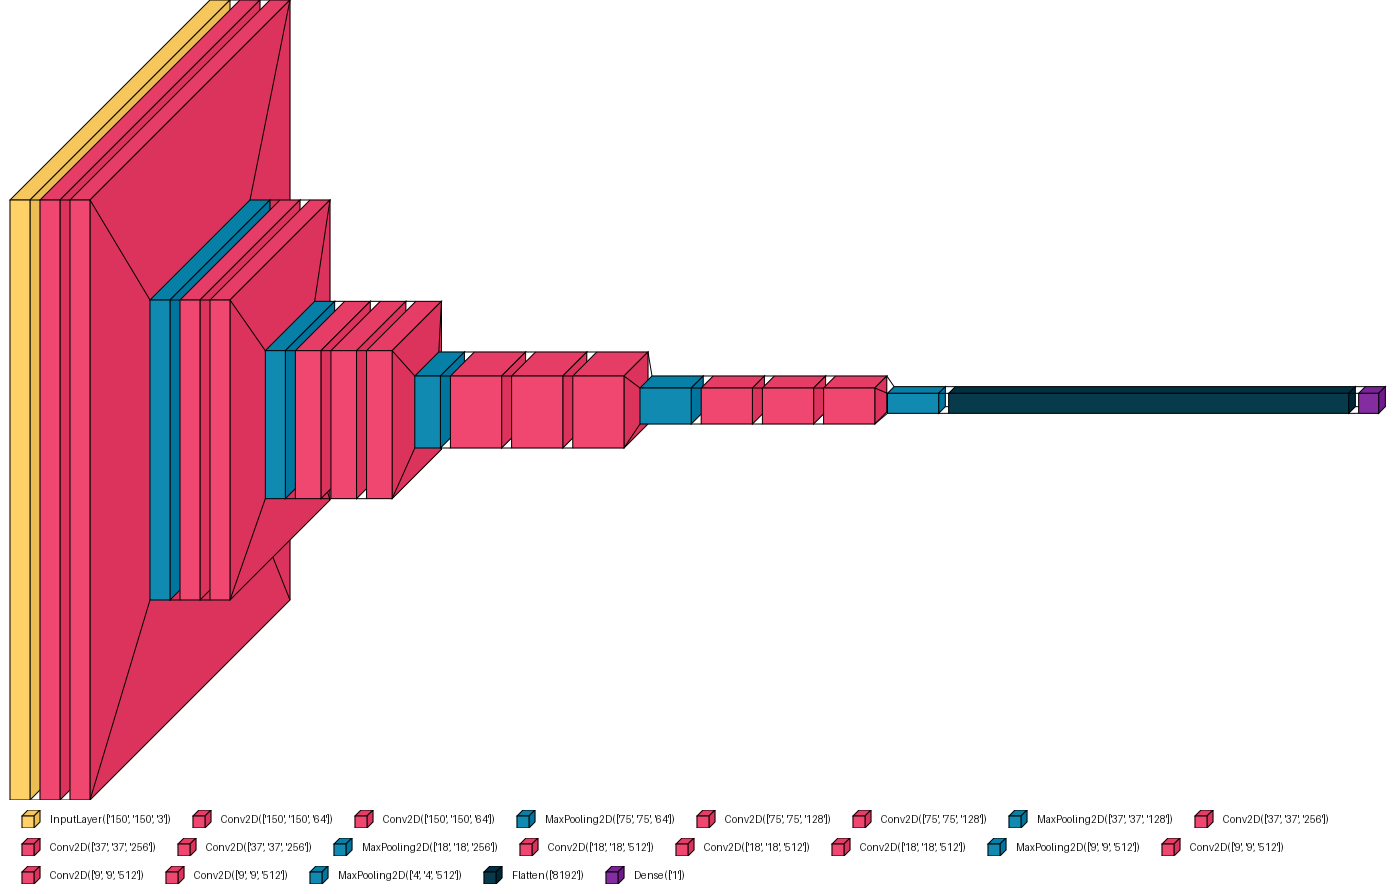

In [42]:
vk.layered_view(model, legend=True, show_dimension=True)

In [43]:
history = model.fit(
    train_generator,
    steps_per_epoch=int(train_len/32),
    epochs=3,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=int(val_len/32)
)

Epoch 1/3
494/494 ━━━━━━━━━━━━━━━━━━━━ 879s 2s/step - accuracy: 0.7984 - auc: 0.8836 - loss: 0.3929 - val_accuracy: 0.9336 - val_auc: 0.9845 - val_loss: 0.1637
Epoch 2/3
  1/494 ━━━━━━━━━━━━━━━━━━━━ 8:13 1s/step - accuracy: 0.9062 - auc: 0.9762 - loss: 0.2496

E:\Stuff\Python\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 516us/step - accuracy: 0.9062 - auc: 0.9762 - loss: 0.2496 - val_accuracy: 0.8571 - val_auc: 1.0000 - val_loss: 0.1511
Epoch 3/3
494/494 ━━━━━━━━━━━━━━━━━━━━ 722s 1s/step - accuracy: 0.9344 - auc: 0.9846 - loss: 0.1582 - val_accuracy: 0.9492 - val_auc: 0.9901 - val_loss: 0.1247


In [44]:
model.save('model.h5')
pkl.dump(history.history, open('model_history.pkl', 'wb'))

In [45]:
results = model.evaluate(test_generator, steps=nb_samples, verbose=1)

loss = results[0]
acc = results[1] 
print('accuracy test: ',acc)
print('loss test: ',loss)

e:\LapTrinh\PROJECT\ML\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6738/6738 ━━━━━━━━━━━━━━━━━━━━ 270s 40ms/step - accuracy: 0.9333 - auc: 0.5154 - loss: 0.1450
accuracy test:  0.9443454742431641
loss test:  0.12753738462924957


<Figure size 640x480 with 0 Axes>

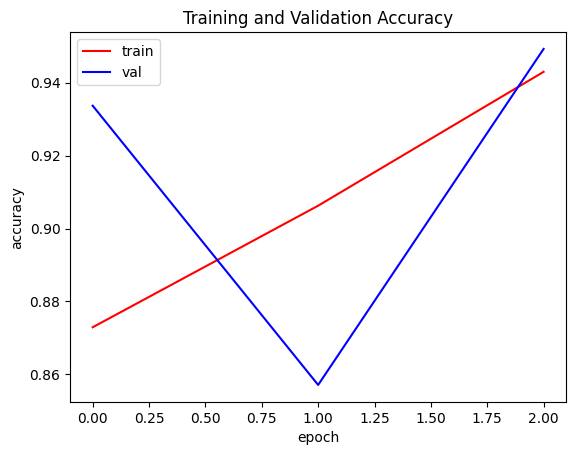

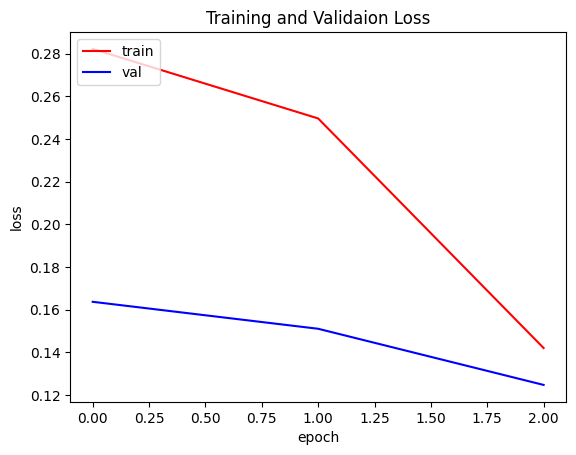

<Figure size 640x480 with 0 Axes>

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validaion Loss')
plt.figure()

In [47]:
predictions = model.predict(test_generator, steps=nb_samples, verbose=1)
y_pred = predictions > 0.5
y_true = test_generator.classes

6738/6738 ━━━━━━━━━━━━━━━━━━━━ 272s 40ms/step


In [48]:
labels = ['Fresh', 'Rotten']
print(classification_report(y_true, y_pred, target_names=labels))

print('accuracy score: ', accuracy_score(y_true, y_pred))
print('recall score: ', recall_score(y_true, y_pred))
print('precision score: ', precision_score(y_true, y_pred))
print('f1 score: ', f1_score(y_true, y_pred))

              precision    recall  f1-score   support

       Fresh       0.98      0.91      0.94      3245
      Rotten       0.92      0.98      0.95      3493

    accuracy                           0.94      6738
   macro avg       0.95      0.94      0.94      6738
weighted avg       0.95      0.94      0.94      6738

accuracy score:  0.9443455031166518
recall score:  0.9785284855425136
precision score:  0.9193114577729963
f1 score:  0.9479961170434059


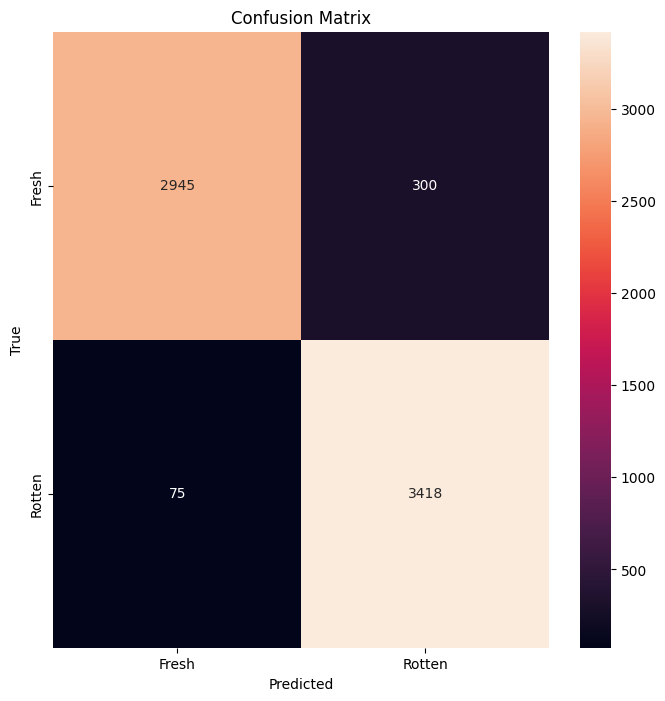

In [49]:
cm = confusion_matrix(y_true=y_true, y_pred=y_pred)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Add more layers

In [94]:
pre_trained_model = VGG16(input_shape=(150, 150, 3), include_top=False, weights='imagenet')


for layer in pre_trained_model.layers[:-5]:
    layer.trainable = False


x = Flatten()(pre_trained_model.output)
x = Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.0001))(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.0001))(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(1, activation='sigmoid')(x)


######################### Fully Connected Layer ################################

model = Model(pre_trained_model.input, x)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00005),
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

pd.set_option('max_colwidth', None)
layers = [(layer, layer.name, layer.trainable) for layer in pre_trained_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

Layer Type      Layer Name  \
0   <InputLayer name=input_layer_22, built=True>  input_layer_22   
1         <Conv2D name=block1_conv1, built=True>    block1_conv1   
2         <Conv2D name=block1_conv2, built=True>    block1_conv2   
3    <MaxPooling2D name=block1_pool, built=True>     block1_pool   
4         <Conv2D name=block2_conv1, built=True>    block2_conv1   
5         <Conv2D name=block2_conv2, built=True>    block2_conv2   
6    <MaxPooling2D name=block2_pool, built=True>     block2_pool   
7         <Conv2D name=block3_conv1, built=True>    block3_conv1   
8         <Conv2D name=block3_conv2, built=True>    block3_conv2   
9         <Conv2D name=block3_conv3, built=True>    block3_conv3   
10   <MaxPooling2D name=block3_pool, built=True>     block3_pool   
11        <Conv2D name=block4_conv1, built=True>    block4_conv1   
12        <Conv2D name=block4_conv2, built=True>    block4_conv2   
13        <Conv2D name=block4_conv3, built=True>    block4_conv3   
14   <MaxPooling2D name=block4_pool, built=True>     block4_pool   
15        <Conv2D name=block5_conv1, built=True>    block5_conv1   
16        <Conv2D name=block5_conv2, built=True>    block5_conv2   
17        <Conv2D name=block5_conv3, built=True>    block5_conv3   
18   <MaxPooling2D name=block5_pool, built=True>     block5_pool   

    Layer Trainable  
0             False  
1             False  
2             False  
3             False  
4             False  
5             False  
6             False  
7             False  
8             False  
9             False  
10            False  
11            False  
12            False  
13            False  
14             True  
15             True  
16             True  
17             True  
18             True

e:\LapTrinh\PROJECT\ML\.venv\Lib\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


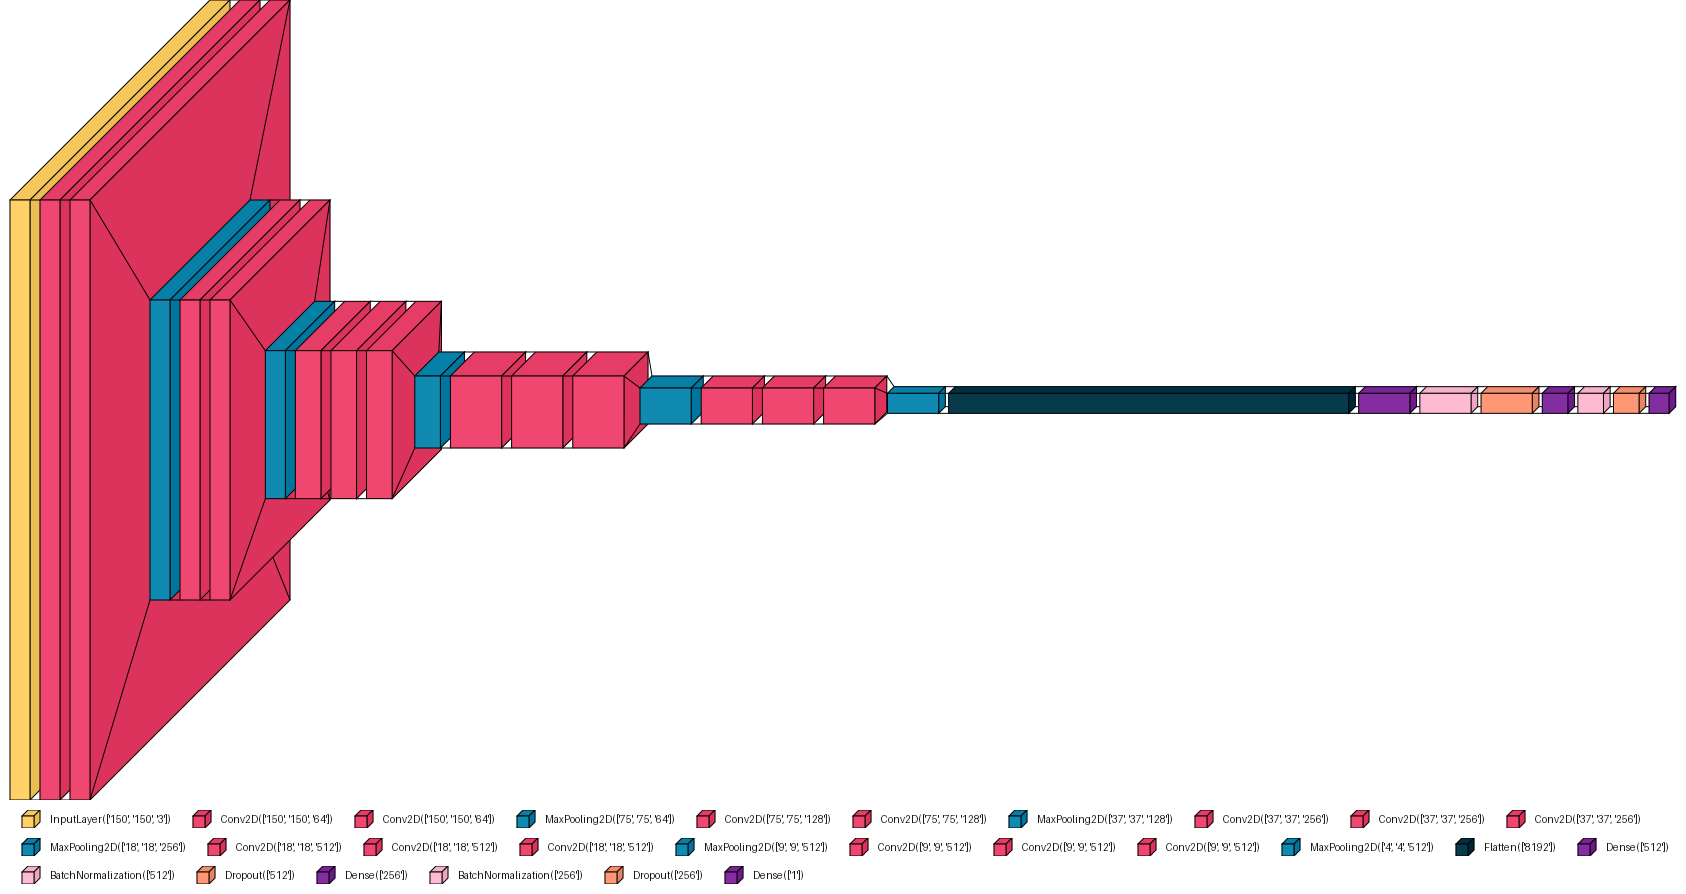

In [95]:
vk.layered_view(model, legend=True, show_dimension=True)

In [96]:

history = model.fit(
    train_generator,
    steps_per_epoch=int(train_len/32),
    epochs=3,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=int(val_len/32)
)


Epoch 1/3
494/494 ━━━━━━━━━━━━━━━━━━━━ 751s 2s/step - accuracy: 0.7687 - auc: 0.8504 - loss: 0.6259 - val_accuracy: 0.9056 - val_auc: 0.9724 - val_loss: 0.3552
Epoch 2/3
  1/494 ━━━━━━━━━━━━━━━━━━━━ 8:11 997ms/step - accuracy: 0.8750 - auc: 0.9354 - loss: 0.4913

E:\Stuff\Python\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 637us/step - accuracy: 0.8750 - auc: 0.9354 - loss: 0.4913 - val_accuracy: 1.0000 - val_auc: 1.0000 - val_loss: 0.1704
Epoch 3/3
494/494 ━━━━━━━━━━━━━━━━━━━━ 725s 1s/step - accuracy: 0.9016 - auc: 0.9649 - loss: 0.3644 - val_accuracy: 0.9297 - val_auc: 0.9862 - val_loss: 0.2871


In [97]:
# model = load_model('model2.h5')
# history = pkl.load(open('model2_history.pkl', 'rb'))

In [98]:
results = model.evaluate(test_generator, steps=nb_samples, verbose=1)

loss = results[0]
acc = results[1] 
print('accuracy test: ',acc)
print('loss test: ',loss)

6738/6738 ━━━━━━━━━━━━━━━━━━━━ 302s 45ms/step - accuracy: 0.9219 - auc: 0.5115 - loss: 0.3015
accuracy test:  0.9321756958961487
loss test:  0.2850078344345093


<Figure size 640x480 with 0 Axes>

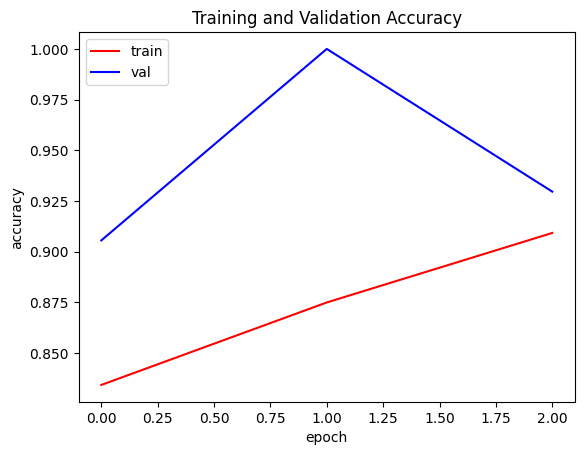

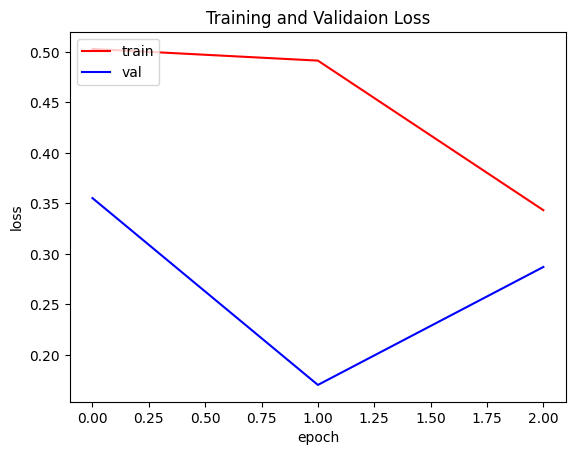

<Figure size 640x480 with 0 Axes>

In [99]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validaion Loss')
plt.figure()

In [100]:
predictions = model.predict(test_generator, steps=nb_samples, verbose=1)
y_pred = predictions > 0.5
y_true = test_generator.classes

6738/6738 ━━━━━━━━━━━━━━━━━━━━ 266s 39ms/step


In [101]:
labels = ['Fresh', 'Rotten']
print(classification_report(y_true, y_pred, target_names=labels))

print('accuracy score: ', accuracy_score(y_true, y_pred))
print('recall score: ', recall_score(y_true, y_pred))
print('precision score: ', precision_score(y_true, y_pred))
print('f1 score: ', f1_score(y_true, y_pred))

              precision    recall  f1-score   support

       Fresh       0.96      0.89      0.93      3245
      Rotten       0.91      0.97      0.94      3493

    accuracy                           0.93      6738
   macro avg       0.94      0.93      0.93      6738
weighted avg       0.93      0.93      0.93      6738

accuracy score:  0.9321757197981597
recall score:  0.9696535929000859
precision score:  0.906099518459069
f1 score:  0.9367998893652331


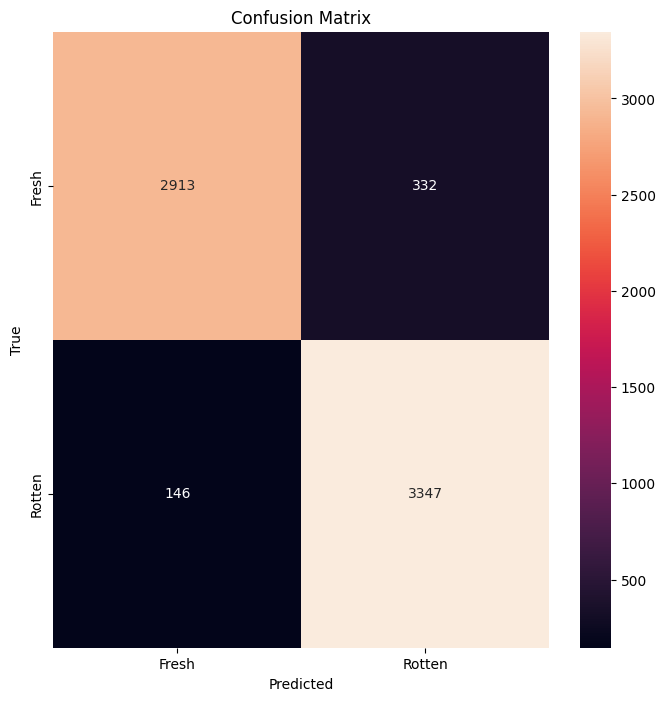

In [82]:
cm = confusion_matrix(y_true=y_true, y_pred=y_pred)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Fine-tuning model

In [39]:
model = load_model('model2.h5')
# history = pkl.load(open('model2_history.pkl', 'rb'))

In [40]:
# Unfreeze layers
for layer in model.layers[:-5]:
    layer.trainable = True

adam_tuned = Adam(learning_rate=0.00002, beta_1=0.9, beta_2=0.999, decay=0.0, amsgrad=False)  # lower the learning rate
model.compile(optimizer=adam_tuned,
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

pd.set_option('max_colwidth', None)
layers = [(layer, layer.name, layer.trainable) for layer in model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

e:\LapTrinh\PROJECT\ML\.venv\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Layer Type  \
0                     <InputLayer name=input_layer, built=True>   
1                        <Conv2D name=block1_conv1, built=True>   
2                        <Conv2D name=block1_conv2, built=True>   
3                   <MaxPooling2D name=block1_pool, built=True>   
4                        <Conv2D name=block2_conv1, built=True>   
5                        <Conv2D name=block2_conv2, built=True>   
6                   <MaxPooling2D name=block2_pool, built=True>   
7                        <Conv2D name=block3_conv1, built=True>   
8                        <Conv2D name=block3_conv2, built=True>   
9                        <Conv2D name=block3_conv3, built=True>   
10                  <MaxPooling2D name=block3_pool, built=True>   
11                       <Conv2D name=block4_conv1, built=True>   
12                       <Conv2D name=block4_conv2, built=True>   
13                       <Conv2D name=block4_conv3, built=True>   
14                  <MaxPooling2D name=block4_pool, built=True>   
15                       <Conv2D name=block5_conv1, built=True>   
16                       <Conv2D name=block5_conv2, built=True>   
17                       <Conv2D name=block5_conv3, built=True>   
18                  <MaxPooling2D name=block5_pool, built=True>   
19                           <Flatten name=flatten, built=True>   
20                               <Dense name=dense, built=True>   
21    <BatchNormalization name=batch_normalization, built=True>   
22                           <Dropout name=dropout, built=True>   
23                             <Dense name=dense_1, built=True>   
24  <BatchNormalization name=batch_normalization_1, built=True>   
25                         <Dropout name=dropout_1, built=True>   
26                             <Dense name=dense_2, built=True>   

               Layer Name  Layer Trainable  
0             input_layer             True  
1            block1_conv1             True  
2            block1_conv2             True  
3             block1_pool             True  
4            block2_conv1             True  
5            block2_conv2             True  
6             block2_pool             True  
7            block3_conv1             True  
8            block3_conv2             True  
9            block3_conv3             True  
10            block3_pool             True  
11           block4_conv1             True  
12           block4_conv2             True  
13           block4_conv3             True  
14            block4_pool             True  
15           block5_conv1             True  
16           block5_conv2             True  
17           block5_conv3             True  
18            block5_pool             True  
19                flatten             True  
20                  dense             True  
21    batch_normalization             True  
22                dropout             True  
23                dense_1             True  
24  batch_normalization_1             True  
25              dropout_1             True  
26                dense_2             True

e:\LapTrinh\PROJECT\ML\.venv\Lib\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


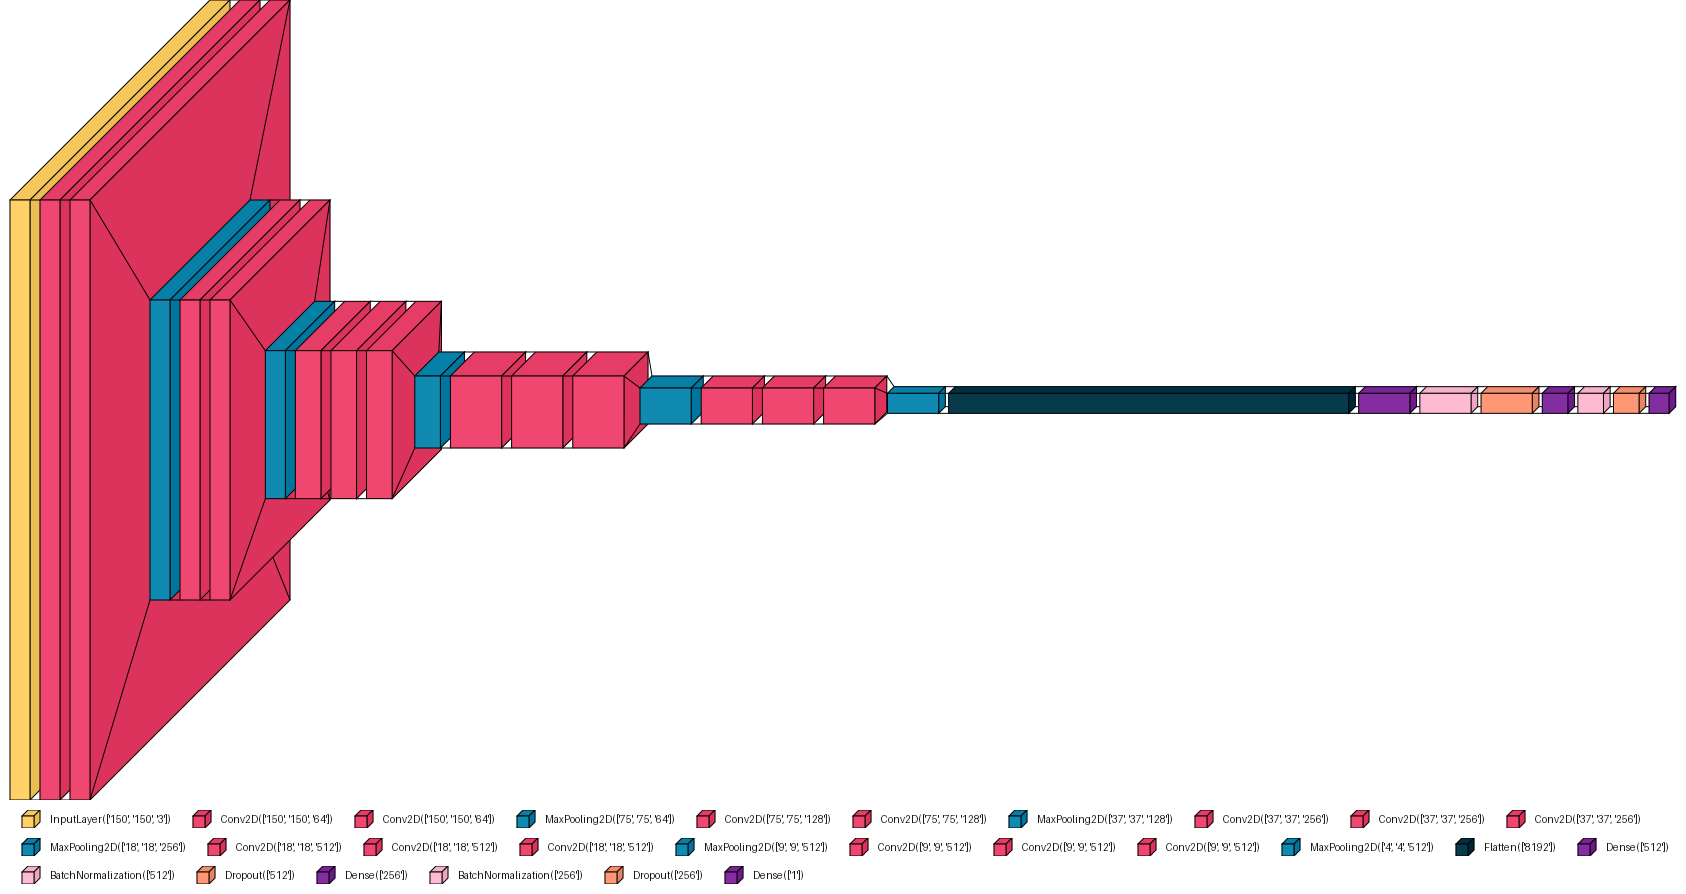

In [41]:
vk.layered_view(model, legend=True, show_dimension=True)

In [42]:
history = model.fit(
    train_generator,
    steps_per_epoch=int(train_len/32),
    epochs=3,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=int(val_len/32)
)

Epoch 1/3
494/494 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9240 - auc: 0.9781 - loss: 0.3017

e:\LapTrinh\PROJECT\ML\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


494/494 ━━━━━━━━━━━━━━━━━━━━ 1529s 3s/step - accuracy: 0.9240 - auc: 0.9781 - loss: 0.3017 - val_accuracy: 0.9608 - val_auc: 0.9947 - val_loss: 0.1996
Epoch 2/3
  1/494 ━━━━━━━━━━━━━━━━━━━━ 21:14 3s/step - accuracy: 0.9375 - auc: 0.9881 - loss: 0.2559

E:\Stuff\Python\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


494/494 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9375 - auc: 0.9881 - loss: 0.2559 - val_accuracy: 1.0000 - val_auc: 1.0000 - val_loss: 0.1167
Epoch 3/3
494/494 ━━━━━━━━━━━━━━━━━━━━ 1414s 3s/step - accuracy: 0.9584 - auc: 0.9920 - loss: 0.2104 - val_accuracy: 0.9621 - val_auc: 0.9946 - val_loss: 0.1927


In [43]:
results = model.evaluate(test_generator, steps=nb_samples, verbose=1)

loss = results[0]
acc = results[1] 
print('accuracy test: ',acc)
print('loss test: ',loss)

6738/6738 ━━━━━━━━━━━━━━━━━━━━ 232s 34ms/step - accuracy: 0.9690 - auc: 0.5165 - loss: 0.1780
accuracy test:  0.9634906649589539
loss test:  0.18807393312454224


<Figure size 640x480 with 0 Axes>

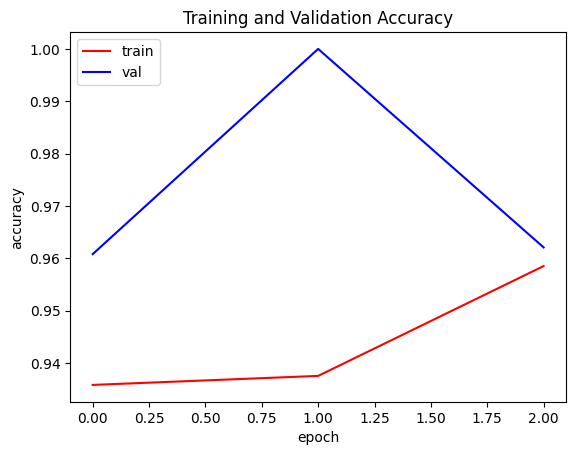

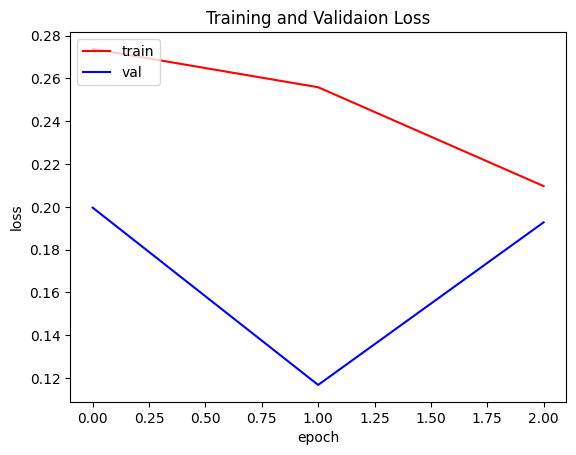

<Figure size 640x480 with 0 Axes>

In [44]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validaion Loss')
plt.figure()

In [45]:
predictions = model.predict(test_generator, steps=nb_samples, verbose=1)
y_pred = predictions > 0.5
y_true = test_generator.classes

6738/6738 ━━━━━━━━━━━━━━━━━━━━ 237s 35ms/step


In [46]:
labels = ['Fresh', 'Rotten']
print(classification_report(y_true, y_pred, target_names=labels))

print('accuracy score: ', accuracy_score(y_true, y_pred))
print('recall score: ', recall_score(y_true, y_pred))
print('precision score: ', precision_score(y_true, y_pred))
print('f1 score: ', f1_score(y_true, y_pred))

              precision    recall  f1-score   support

       Fresh       0.96      0.97      0.96      3245
      Rotten       0.97      0.96      0.96      3493

    accuracy                           0.96      6738
   macro avg       0.96      0.96      0.96      6738
weighted avg       0.96      0.96      0.96      6738

accuracy score:  0.9634906500445236
recall score:  0.9613512739765244
precision score:  0.968002306140098
f1 score:  0.9646653260557311


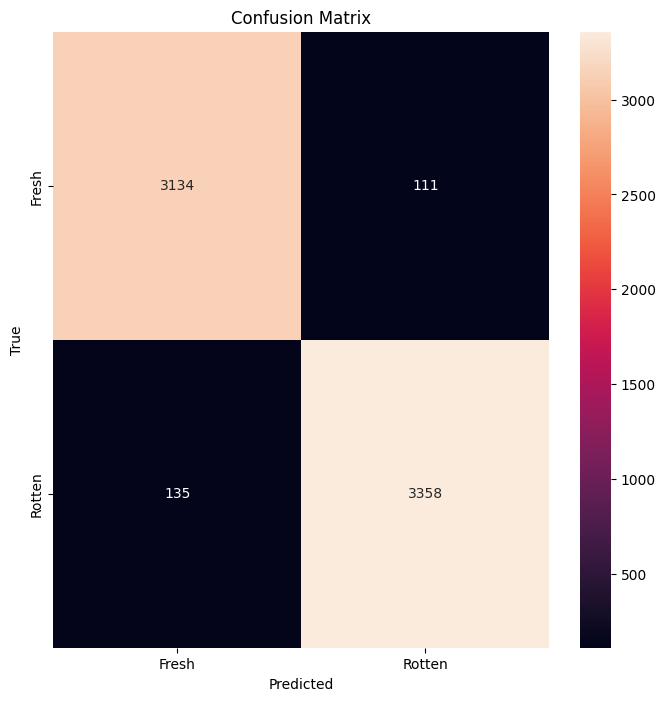

In [47]:
cm = confusion_matrix(y_true=y_true, y_pred=y_pred)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### InceptionV3

#### Basic model

In [52]:
pre_trained_model = InceptionV3(input_shape=(150, 150, 3), include_top=False, weights='imagenet')

for layer in pre_trained_model.layers[:-5]:
    layer.trainable = False


x = Flatten()(pre_trained_model.output)
x = Dense(1, activation='sigmoid')(x)


######################### Fully Connected Layer ################################

model = Model(pre_trained_model.input, x)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00005),
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

pd.set_option('max_colwidth', None)
layers = [(layer, layer.name, layer.trainable) for layer in pre_trained_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

Layer Type  \
0                     <InputLayer name=input_layer_17, built=True>   
1                              <Conv2D name=conv2d_94, built=True>   
2    <BatchNormalization name=batch_normalization_100, built=True>   
3                      <Activation name=activation_94, built=True>   
4                              <Conv2D name=conv2d_95, built=True>   
..                                                             ...   
306                   <Activation name=activation_179, built=True>   
307                        <Concatenate name=mixed9_1, built=True>   
308                   <Concatenate name=concatenate_3, built=True>   
309                   <Activation name=activation_187, built=True>   
310                         <Concatenate name=mixed10, built=True>   

                  Layer Name  Layer Trainable  
0             input_layer_17            False  
1                  conv2d_94            False  
2    batch_normalization_100            False  
3              activation_94            False  
4                  conv2d_95            False  
..                       ...              ...  
306           activation_179             True  
307                 mixed9_1             True  
308            concatenate_3             True  
309           activation_187             True  
310                  mixed10             True  

[311 rows x 3 columns]

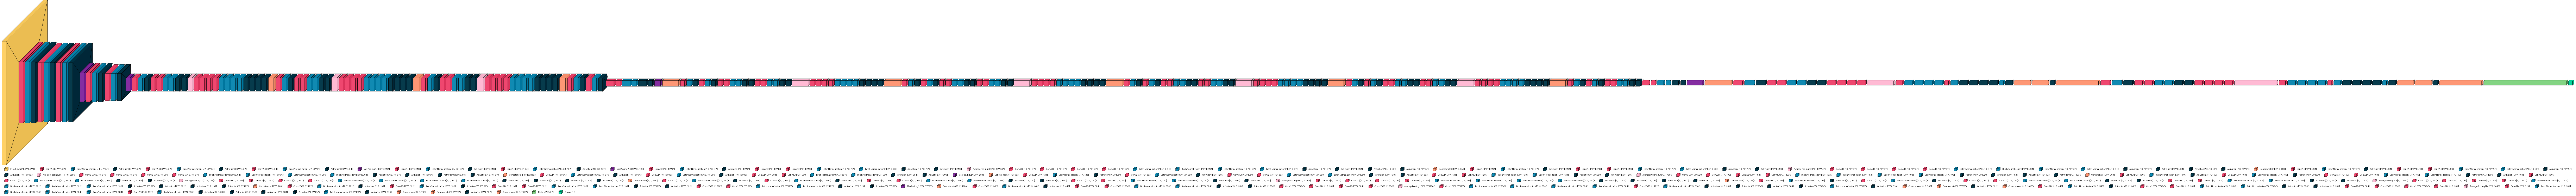

In [54]:
vk.layered_view(model, legend=True, show_dimension=True)

In [55]:
history = model.fit(
    train_generator,
    steps_per_epoch=int(train_len/32),
    epochs=3,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=int(val_len/32)
)

model.save('pre_inceptionV3.keras')
pkl.dump(history, open('pre_inceptionV3_history.pkl', 'wb'))

Epoch 1/3
494/494 ━━━━━━━━━━━━━━━━━━━━ 548s 1s/step - accuracy: 0.7039 - auc: 0.7714 - loss: 0.6575 - val_accuracy: 0.8672 - val_auc: 0.9483 - val_loss: 0.3021
Epoch 2/3
  1/494 ━━━━━━━━━━━━━━━━━━━━ 1:43 209ms/step - accuracy: 0.9062 - auc: 0.9275 - loss: 0.3615

E:\Stuff\Python\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


494/494 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - accuracy: 0.9062 - auc: 0.9275 - loss: 0.3615 - val_accuracy: 1.0000 - val_auc: 1.0000 - val_loss: 0.1449
Epoch 3/3
494/494 ━━━━━━━━━━━━━━━━━━━━ 234s 473ms/step - accuracy: 0.8707 - auc: 0.9448 - loss: 0.2994 - val_accuracy: 0.8931 - val_auc: 0.9622 - val_loss: 0.2514


In [48]:
# model = load_model('pre_inceptionV3.keras')
# history = pkl.load(open('pre_inceptionV3_history.pkl', 'rb'))

<Figure size 640x480 with 0 Axes>

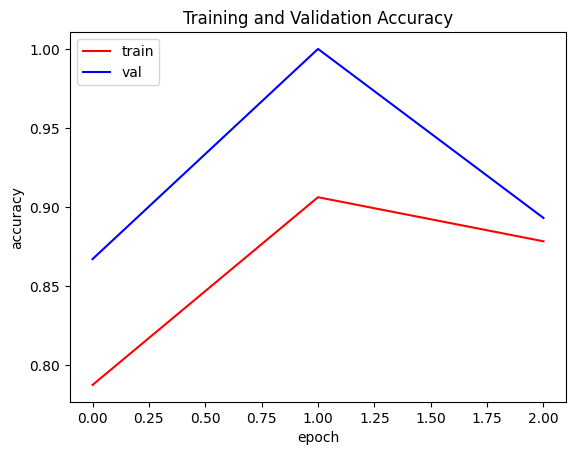

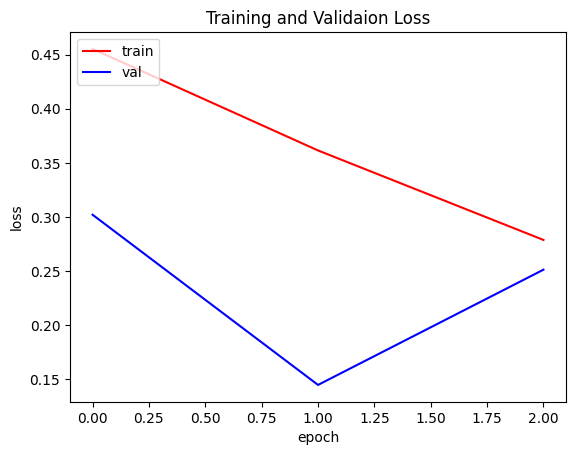

<Figure size 640x480 with 0 Axes>

In [56]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validaion Loss')
plt.figure()

In [57]:
results = model.evaluate(test_generator, steps=nb_samples, verbose=1)

loss = results[0]
acc = results[1] 
print('accuracy test: ',acc)
print('loss test: ',loss)

6738/6738 ━━━━━━━━━━━━━━━━━━━━ 97s 14ms/step - accuracy: 0.9293 - auc: 0.5034 - loss: 0.1736
accuracy test:  0.8928465247154236
loss test:  0.23930837213993073


In [58]:
predictions = model.predict(test_generator, steps=nb_samples, verbose=1)
y_pred = predictions > 0.5
y_true = test_generator.classes

6738/6738 ━━━━━━━━━━━━━━━━━━━━ 100s 15ms/step


In [59]:
labels = ['Fresh', 'Rotten']
print(classification_report(y_true, y_pred, target_names=labels))

print('accuracy score: ', accuracy_score(y_true, y_pred))
print('recall score: ', recall_score(y_true, y_pred))
print('precision score: ', precision_score(y_true, y_pred))
print('f1 score: ', f1_score(y_true, y_pred))

              precision    recall  f1-score   support

       Fresh       0.86      0.93      0.89      3245
      Rotten       0.93      0.86      0.89      3493

    accuracy                           0.89      6738
   macro avg       0.89      0.89      0.89      6738
weighted avg       0.90      0.89      0.89      6738

accuracy score:  0.8928465420005937
recall score:  0.8597194388777555
precision score:  0.9282843894899536
f1 score:  0.8926872770511296


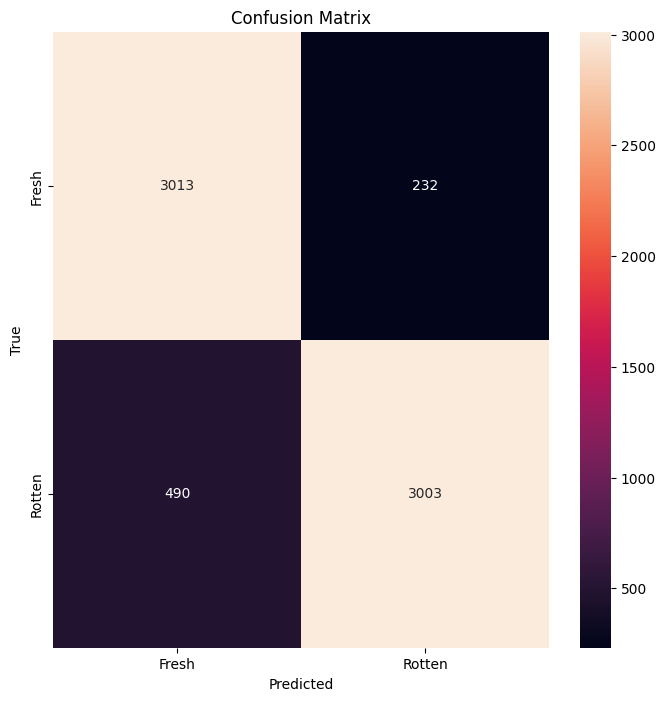

In [60]:
cm = confusion_matrix(y_true=y_true, y_pred=y_pred)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Add more layers

In [105]:
pre_trained_model = InceptionV3(input_shape=(150, 150, 3), include_top=False, weights='imagenet')

for layer in pre_trained_model.layers[:-5]:
    layer.trainable = False

x = layers.GlobalAveragePooling2D()(pre_trained_model.output)
x = layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.0005))(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.0005))(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(1, activation='sigmoid')(x)

######################### Fully Connected Layer ################################

model = Model(pre_trained_model.input, x)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

pd.set_option('max_colwidth', None)
layers = [(layer, layer.name, layer.trainable) for layer in pre_trained_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

Layer Type  \
0                     <InputLayer name=input_layer_25, built=True>   
1                             <Conv2D name=conv2d_474, built=True>   
2    <BatchNormalization name=batch_normalization_486, built=True>   
3                     <Activation name=activation_470, built=True>   
4                             <Conv2D name=conv2d_475, built=True>   
..                                                             ...   
306                   <Activation name=activation_555, built=True>   
307                        <Concatenate name=mixed9_1, built=True>   
308                  <Concatenate name=concatenate_11, built=True>   
309                   <Activation name=activation_563, built=True>   
310                         <Concatenate name=mixed10, built=True>   

                  Layer Name  Layer Trainable  
0             input_layer_25            False  
1                 conv2d_474            False  
2    batch_normalization_486            False  
3             activation_470            False  
4                 conv2d_475            False  
..                       ...              ...  
306           activation_555             True  
307                 mixed9_1             True  
308           concatenate_11             True  
309           activation_563             True  
310                  mixed10             True  

[311 rows x 3 columns]

e:\LapTrinh\PROJECT\ML\.venv\Lib\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


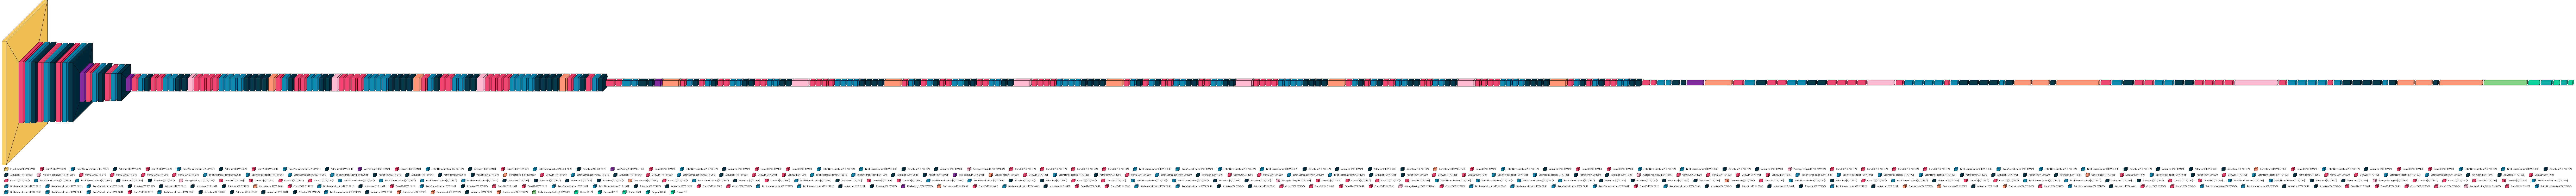

In [106]:
vk.layered_view(model, legend=True, show_dimension=True)

In [107]:
history = model.fit(
    train_generator,
    steps_per_epoch=int(train_len/32),
    epochs=3,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=int(val_len/32)
)

model.save('inceptionV3.keras')
pkl.dump(history, open('inceptionV3_history.pkl', 'wb'))

Epoch 1/3
494/494 ━━━━━━━━━━━━━━━━━━━━ 494s 987ms/step - accuracy: 0.7496 - auc: 0.8310 - loss: 1.0976 - val_accuracy: 0.8996 - val_auc: 0.9666 - val_loss: 0.7836
Epoch 2/3
  1/494 ━━━━━━━━━━━━━━━━━━━━ 1:41 206ms/step - accuracy: 0.8438 - auc: 0.9412 - loss: 0.8470

E:\Stuff\Python\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 787us/step - accuracy: 0.8438 - auc: 0.9412 - loss: 0.8470 - val_accuracy: 1.0000 - val_auc: 1.0000 - val_loss: 0.7153
Epoch 3/3
494/494 ━━━━━━━━━━━━━━━━━━━━ 218s 442ms/step - accuracy: 0.8833 - auc: 0.9553 - loss: 0.8083 - val_accuracy: 0.9208 - val_auc: 0.9787 - val_loss: 0.7074


In [108]:
# model = load_model('inceptionV3.keras')
# history = pkl.load(open('inceptionV3_history.pkl', 'rb'))

<Figure size 640x480 with 0 Axes>

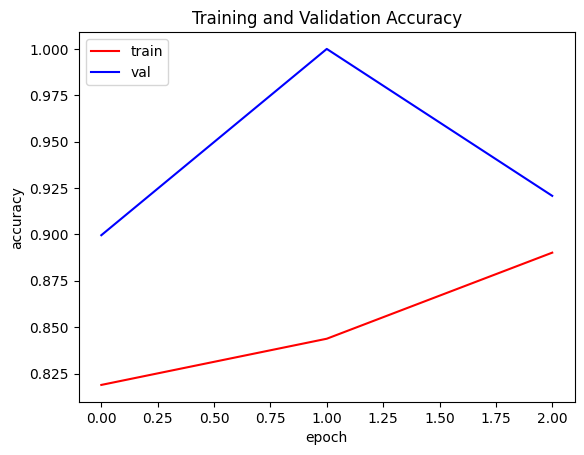

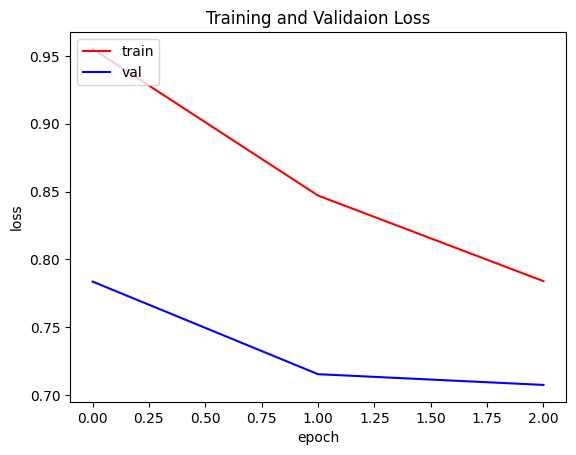

<Figure size 640x480 with 0 Axes>

In [109]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validaion Loss')
plt.figure()

In [110]:
results = model.evaluate(test_generator, steps=nb_samples, verbose=1)

loss = results[0]
acc = results[1] 
print('accuracy test: ',acc)
print('loss test: ',loss)

6738/6738 ━━━━━━━━━━━━━━━━━━━━ 98s 15ms/step - accuracy: 0.9287 - auc: 0.5075 - loss: 0.6969
accuracy test:  0.916740894317627
loss test:  0.7156222462654114


In [111]:
predictions = model.predict(test_generator, steps=nb_samples, verbose=1)
y_pred = predictions > 0.5
y_true = test_generator.classes

6738/6738 ━━━━━━━━━━━━━━━━━━━━ 94s 14ms/step


In [112]:
labels = ['Fresh', 'Rotten']
print(classification_report(y_true, y_pred, target_names=labels))

print('accuracy score: ', accuracy_score(y_true, y_pred))
print('recall score: ', recall_score(y_true, y_pred))
print('precision score: ', precision_score(y_true, y_pred))
print('f1 score: ', f1_score(y_true, y_pred))

              precision    recall  f1-score   support

       Fresh       0.91      0.91      0.91      3245
      Rotten       0.92      0.92      0.92      3493

    accuracy                           0.92      6738
   macro avg       0.92      0.92      0.92      6738
weighted avg       0.92      0.92      0.92      6738

accuracy score:  0.9167408726625111
recall score:  0.9198396793587175
precision score:  0.9195764167143675
f1 score:  0.9197080291970803


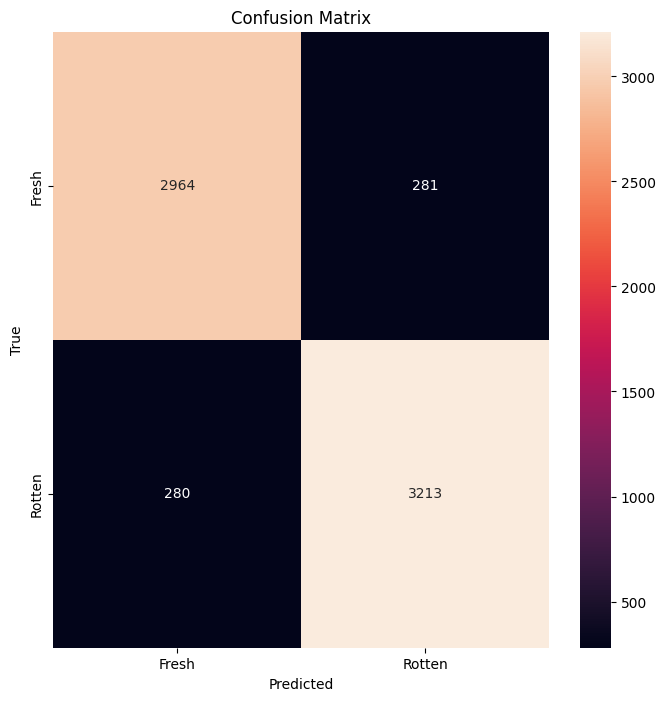

In [113]:
cm = confusion_matrix(y_true=y_true, y_pred=y_pred)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Fine-tuning model

In [48]:
model = load_model('inceptionV3.keras')
history = pkl.load(open('inceptionV3_history.pkl', 'rb'))

In [49]:
# Unfreeze layers
for layer in model.layers[:-5]:
    layer.trainable = True

adam_tuned = Adam(learning_rate=0.00002, beta_1=0.9, beta_2=0.999, decay=0.0, amsgrad=False)  # lower the learning rate
model.compile(optimizer=adam_tuned,
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

pd.set_option('max_colwidth', None)
layers = [(layer, layer.name, layer.trainable) for layer in model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

e:\LapTrinh\PROJECT\ML\.venv\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Layer Type  \
0                    <InputLayer name=input_layer_1, built=True>   
1                               <Conv2D name=conv2d, built=True>   
2    <BatchNormalization name=batch_normalization_2, built=True>   
3                       <Activation name=activation, built=True>   
4                             <Conv2D name=conv2d_1, built=True>   
..                                                           ...   
312                             <Dense name=dense_3, built=True>   
313                         <Dropout name=dropout_2, built=True>   
314                             <Dense name=dense_4, built=True>   
315                         <Dropout name=dropout_3, built=True>   
316                             <Dense name=dense_5, built=True>   

                Layer Name  Layer Trainable  
0            input_layer_1             True  
1                   conv2d             True  
2    batch_normalization_2             True  
3               activation             True  
4                 conv2d_1             True  
..                     ...              ...  
312                dense_3             True  
313              dropout_2             True  
314                dense_4             True  
315              dropout_3             True  
316                dense_5             True  

[317 rows x 3 columns]

e:\LapTrinh\PROJECT\ML\.venv\Lib\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


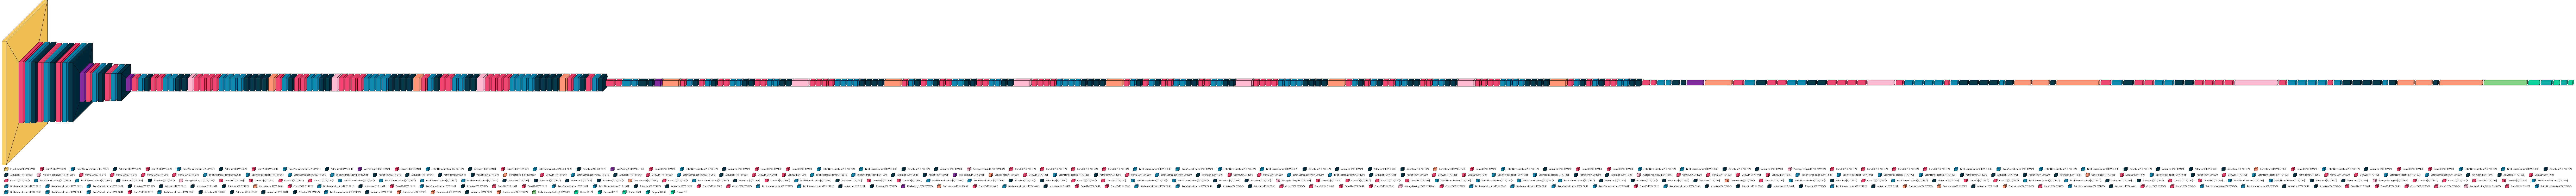

In [50]:
vk.layered_view(model, legend=True, show_dimension=True)

In [51]:
history = model.fit(
    train_generator,
    steps_per_epoch=int(train_len/32),
    epochs=3,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=int(val_len/32)
)

Epoch 1/3
494/494 ━━━━━━━━━━━━━━━━━━━━ 798s 2s/step - accuracy: 0.8988 - auc: 0.9620 - loss: 0.7607 - val_accuracy: 0.9706 - val_auc: 0.9962 - val_loss: 0.5766
Epoch 2/3
  1/494 ━━━━━━━━━━━━━━━━━━━━ 6:55 843ms/step - accuracy: 1.0000 - auc: 1.0000 - loss: 0.5455

E:\Stuff\Python\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - auc: 1.0000 - loss: 0.5455 - val_accuracy: 1.0000 - val_auc: 1.0000 - val_loss: 0.5078
Epoch 3/3
494/494 ━━━━━━━━━━━━━━━━━━━━ 612s 1s/step - accuracy: 0.9585 - auc: 0.9928 - loss: 0.6018 - val_accuracy: 0.9797 - val_auc: 0.9978 - val_loss: 0.5325


In [52]:
results = model.evaluate(test_generator, steps=nb_samples, verbose=1)

loss = results[0]
acc = results[1] 
print('accuracy test: ',acc)
print('loss test: ',loss)

6738/6738 ━━━━━━━━━━━━━━━━━━━━ 98s 15ms/step - accuracy: 0.9792 - auc: 0.5169 - loss: 0.5369
accuracy test:  0.9755120277404785
loss test:  0.5475721955299377


<Figure size 640x480 with 0 Axes>

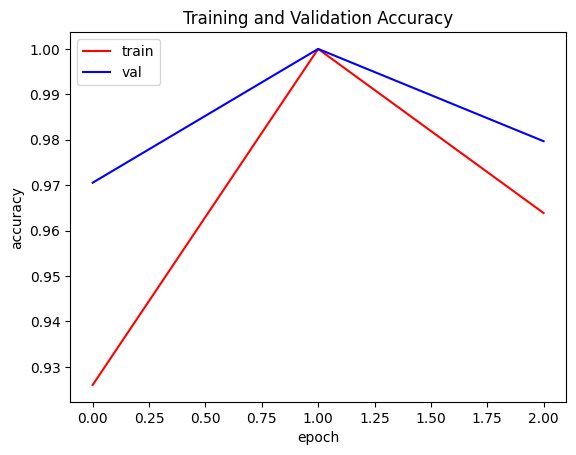

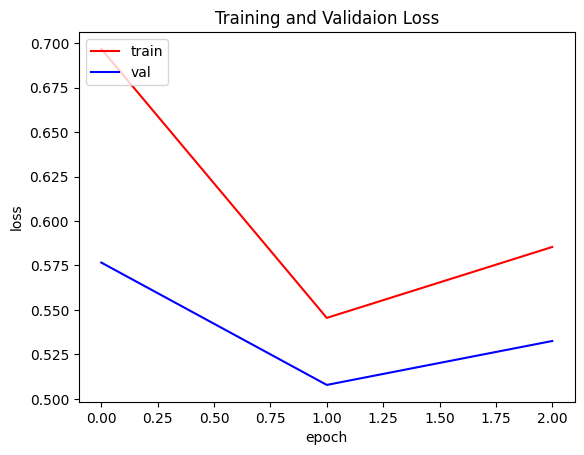

<Figure size 640x480 with 0 Axes>

In [53]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validaion Loss')
plt.figure()

In [54]:
predictions = model.predict(test_generator, steps=nb_samples, verbose=1)
y_pred = predictions > 0.5
y_true = test_generator.classes

6738/6738 ━━━━━━━━━━━━━━━━━━━━ 100s 15ms/step


In [55]:
labels = ['Fresh', 'Rotten']
print(classification_report(y_true, y_pred, target_names=labels))

print('accuracy score: ', accuracy_score(y_true, y_pred))
print('recall score: ', recall_score(y_true, y_pred))
print('precision score: ', precision_score(y_true, y_pred))
print('f1 score: ', f1_score(y_true, y_pred))

              precision    recall  f1-score   support

       Fresh       0.97      0.97      0.97      3245
      Rotten       0.98      0.98      0.98      3493

    accuracy                           0.98      6738
   macro avg       0.98      0.98      0.98      6738
weighted avg       0.98      0.98      0.98      6738

accuracy score:  0.9755120213713268
recall score:  0.9765244775264815
precision score:  0.9762449914138523
f1 score:  0.9763847144697295


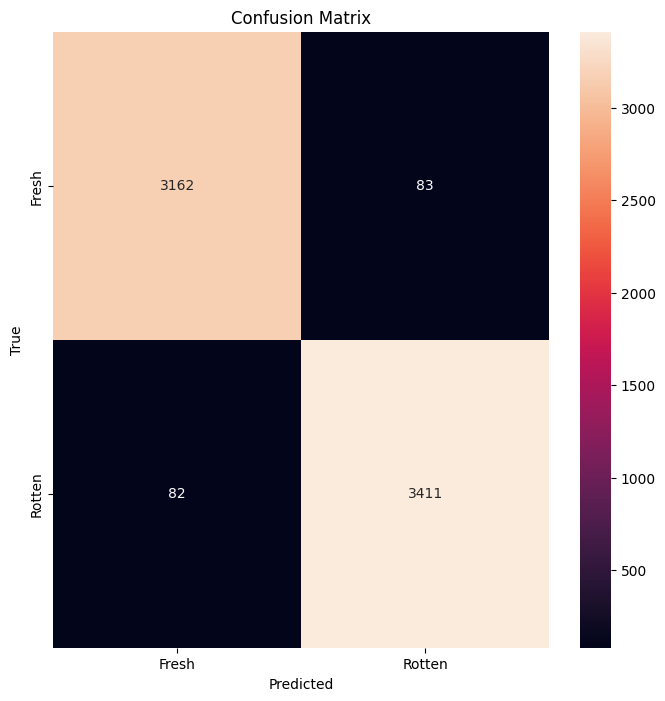

In [56]:
cm = confusion_matrix(y_true=y_true, y_pred=y_pred)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### XCeption

#### Basic model

In [61]:
pre_trained_model = Xception(input_shape=(150, 150, 3), include_top=False, weights='imagenet')

for layer in pre_trained_model.layers[:-5]:
    layer.trainable = False

x = Flatten()(pre_trained_model.output)
x = Dense(1, activation='sigmoid')(x)

######################### Fully Connected Layer ################################

model = Model(pre_trained_model.input, x)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

pd.set_option('max_colwidth', None)
layers = [(layer, layer.name, layer.trainable) for layer in pre_trained_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

Layer Type  \
0                 <InputLayer name=input_layer_18, built=True>   
1                       <Conv2D name=block1_conv1, built=True>   
2        <BatchNormalization name=block1_conv1_bn, built=True>   
3               <Activation name=block1_conv1_act, built=True>   
4                       <Conv2D name=block1_conv2, built=True>   
..                                                         ...   
127  <BatchNormalization name=block14_sepconv1_bn, built=True>   
128         <Activation name=block14_sepconv1_act, built=True>   
129        <SeparableConv2D name=block14_sepconv2, built=True>   
130  <BatchNormalization name=block14_sepconv2_bn, built=True>   
131         <Activation name=block14_sepconv2_act, built=True>   

               Layer Name  Layer Trainable  
0          input_layer_18            False  
1            block1_conv1            False  
2         block1_conv1_bn            False  
3        block1_conv1_act            False  
4            block1_conv2            False  
..                    ...              ...  
127   block14_sepconv1_bn             True  
128  block14_sepconv1_act             True  
129      block14_sepconv2             True  
130   block14_sepconv2_bn             True  
131  block14_sepconv2_act             True  

[132 rows x 3 columns]

e:\LapTrinh\PROJECT\ML\.venv\Lib\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


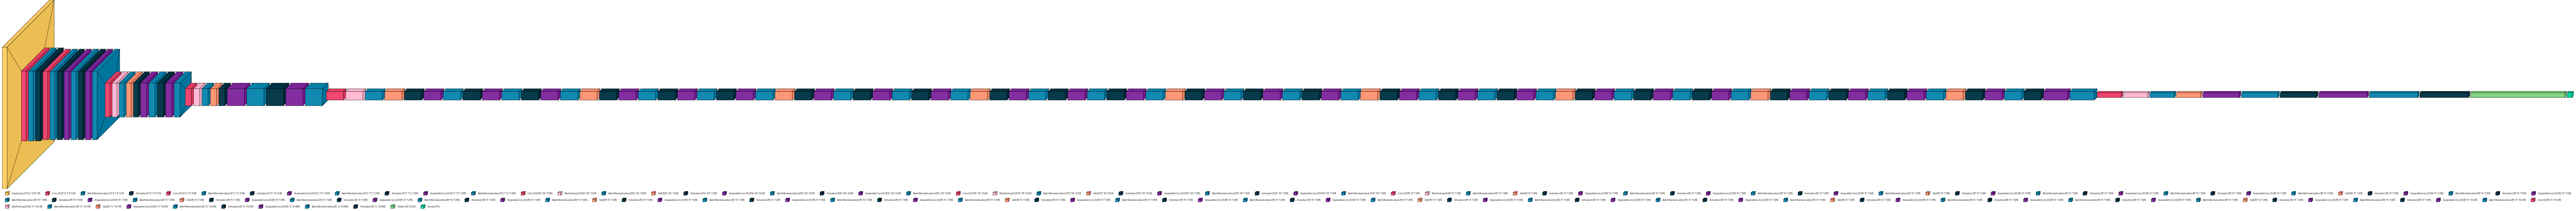

In [62]:
vk.layered_view(model, legend=True, show_dimension=True)

In [63]:
history = model.fit(
    train_generator,
    steps_per_epoch=int(train_len/32),
    epochs=3,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=int(val_len/32)
)

model.save('pre_XCeption.keras')
pkl.dump(history, open('pre_XCeption_history.pkl', 'wb'))

Epoch 1/3
494/494 ━━━━━━━━━━━━━━━━━━━━ 770s 2s/step - accuracy: 0.8464 - auc: 0.9249 - loss: 0.3301 - val_accuracy: 0.9462 - val_auc: 0.9883 - val_loss: 0.1375
Epoch 2/3
  1/494 ━━━━━━━━━━━━━━━━━━━━ 5:26 661ms/step - accuracy: 0.9688 - auc: 0.9941 - loss: 0.1173

E:\Stuff\Python\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 711us/step - accuracy: 0.9688 - auc: 0.9941 - loss: 0.1173 - val_accuracy: 1.0000 - val_auc: 1.0000 - val_loss: 0.0119
Epoch 3/3
494/494 ━━━━━━━━━━━━━━━━━━━━ 469s 950ms/step - accuracy: 0.9386 - auc: 0.9860 - loss: 0.1522 - val_accuracy: 0.9596 - val_auc: 0.9931 - val_loss: 0.1047


<Figure size 640x480 with 0 Axes>

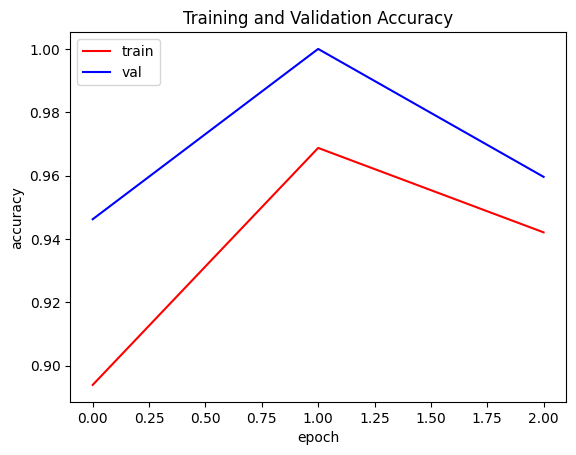

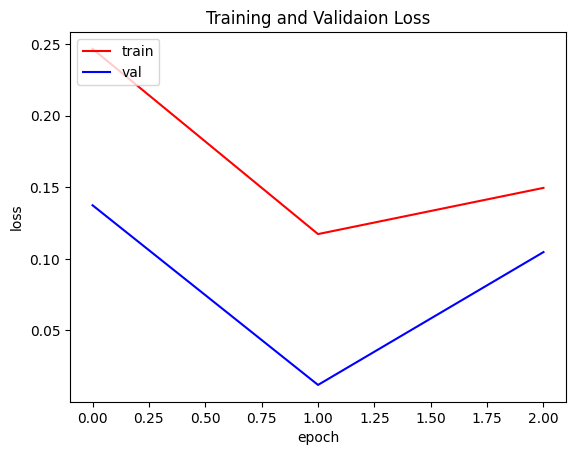

<Figure size 640x480 with 0 Axes>

In [64]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validaion Loss')
plt.figure()

In [65]:
results = model.evaluate(test_generator, steps=nb_samples, verbose=1)

loss = results[0]
acc = results[1] 
print('accuracy test: ',acc)
print('loss test: ',loss)

6738/6738 ━━━━━━━━━━━━━━━━━━━━ 170s 25ms/step - accuracy: 0.9438 - auc: 0.5133 - loss: 0.1413
accuracy test:  0.9480558037757874
loss test:  0.1369098722934723


In [66]:
predictions = model.predict(test_generator, steps=nb_samples, verbose=1)
y_pred = predictions > 0.5
y_true = test_generator.classes

6738/6738 ━━━━━━━━━━━━━━━━━━━━ 173s 25ms/step


In [67]:
labels = ['Fresh', 'Rotten']
print(classification_report(y_true, y_pred, target_names=labels))

print('accuracy score: ', accuracy_score(y_true, y_pred))
print('recall score: ', recall_score(y_true, y_pred))
print('precision score: ', precision_score(y_true, y_pred))
print('f1 score: ', f1_score(y_true, y_pred))

              precision    recall  f1-score   support

       Fresh       0.96      0.93      0.94      3245
      Rotten       0.93      0.97      0.95      3493

    accuracy                           0.95      6738
   macro avg       0.95      0.95      0.95      6738
weighted avg       0.95      0.95      0.95      6738

accuracy score:  0.948055802908875
recall score:  0.9687947323217865
precision score:  0.9335172413793104
f1 score:  0.9508288845181231


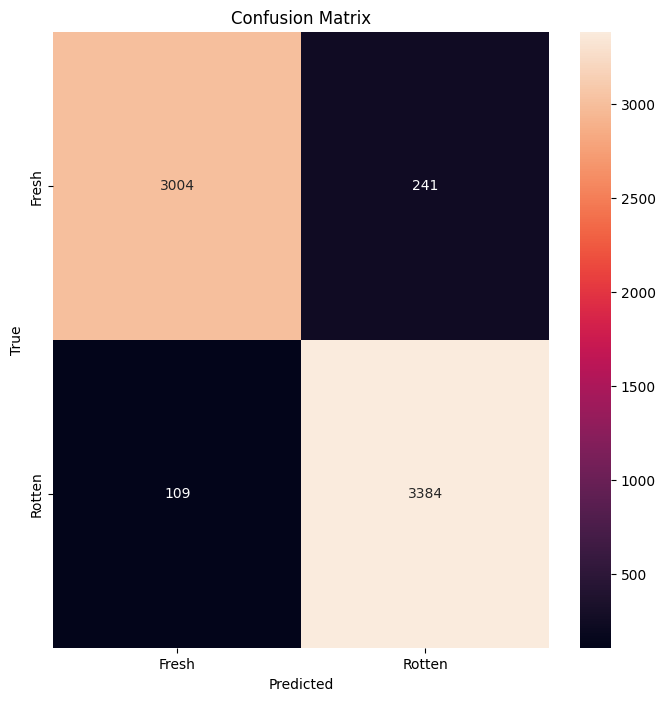

In [68]:
cm = confusion_matrix(y_true=y_true, y_pred=y_pred)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Add more layers

In [140]:
pre_trained_model = Xception(input_shape=(150, 150, 3), include_top=False, weights='imagenet')

for layer in pre_trained_model.layers[:-5]:
    layer.trainable = False

x = layers.GlobalAveragePooling2D()(pre_trained_model.output)
x = layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.0005))(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.0005))(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(1, activation='sigmoid')(x)

######################### Fully Connected Layer ################################

model = Model(pre_trained_model.input, x)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

pd.set_option('max_colwidth', None)
layers = [(layer, layer.name, layer.trainable) for layer in pre_trained_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

Layer Type  \
0                 <InputLayer name=input_layer_16, built=True>   
1                       <Conv2D name=block1_conv1, built=True>   
2        <BatchNormalization name=block1_conv1_bn, built=True>   
3               <Activation name=block1_conv1_act, built=True>   
4                       <Conv2D name=block1_conv2, built=True>   
..                                                         ...   
127  <BatchNormalization name=block14_sepconv1_bn, built=True>   
128         <Activation name=block14_sepconv1_act, built=True>   
129        <SeparableConv2D name=block14_sepconv2, built=True>   
130  <BatchNormalization name=block14_sepconv2_bn, built=True>   
131         <Activation name=block14_sepconv2_act, built=True>   

               Layer Name  Layer Trainable  
0          input_layer_16            False  
1            block1_conv1            False  
2         block1_conv1_bn            False  
3        block1_conv1_act            False  
4            block1_conv2            False  
..                    ...              ...  
127   block14_sepconv1_bn             True  
128  block14_sepconv1_act             True  
129      block14_sepconv2             True  
130   block14_sepconv2_bn             True  
131  block14_sepconv2_act             True  

[132 rows x 3 columns]

e:\LapTrinh\PROJECT\ML\.venv\Lib\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


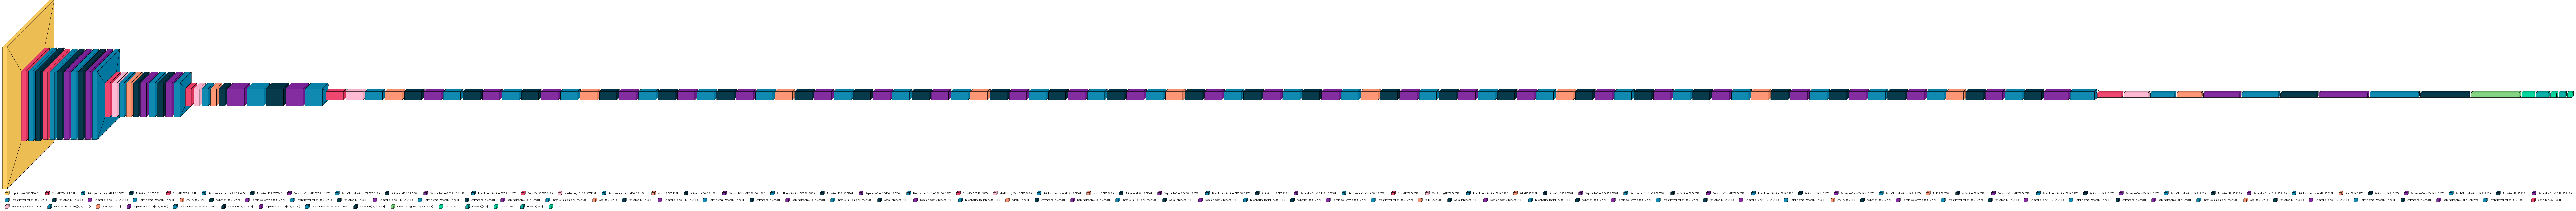

In [134]:
vk.layered_view(model, legend=True, show_dimension=True)

In [142]:
history = model.fit(
    train_generator,
    steps_per_epoch=int(train_len/32),
    epochs=3,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=int(val_len/32)
)

model.save('XCeption.keras')
pkl.dump(history, open('XCeption_history.pkl', 'wb'))

Epoch 1/3
494/494 ━━━━━━━━━━━━━━━━━━━━ 911s 2s/step - accuracy: 0.8185 - auc: 0.9029 - loss: 0.9367 - val_accuracy: 0.9478 - val_auc: 0.9887 - val_loss: 0.6421
Epoch 2/3
  1/494 ━━━━━━━━━━━━━━━━━━━━ 4:12 512ms/step - accuracy: 0.8438 - auc: 1.0000 - loss: 0.7438

E:\Stuff\Python\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8438 - auc: 1.0000 - loss: 0.7438 - val_accuracy: 0.8571 - val_auc: 1.0000 - val_loss: 0.6957
Epoch 3/3
494/494 ━━━━━━━━━━━━━━━━━━━━ 587s 1s/step - accuracy: 0.9279 - auc: 0.9809 - loss: 0.6646 - val_accuracy: 0.9594 - val_auc: 0.9935 - val_loss: 0.5447


<Figure size 640x480 with 0 Axes>

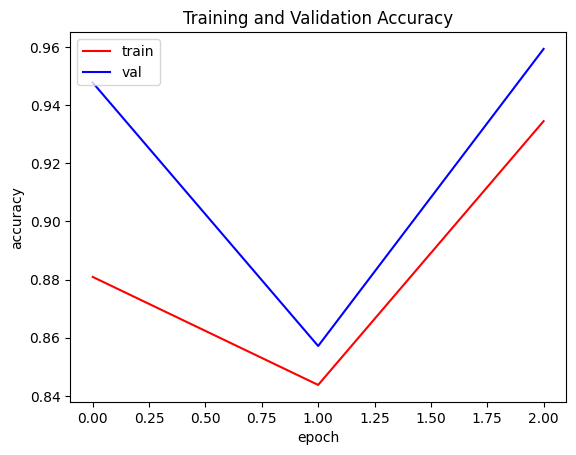

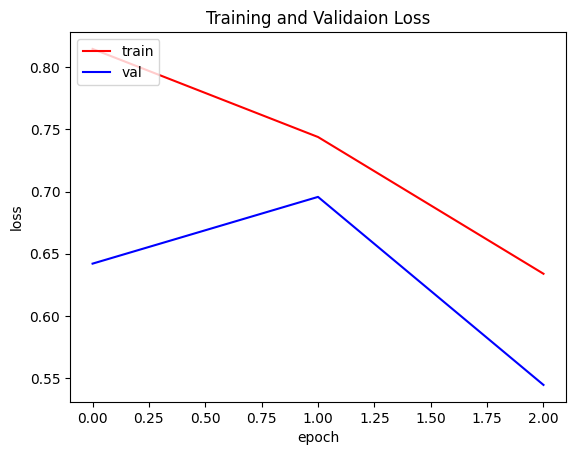

<Figure size 640x480 with 0 Axes>

In [143]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validaion Loss')
plt.figure()

In [145]:
results = model.evaluate(test_generator, steps=nb_samples, verbose=1)

loss = results[0]
acc = results[1] 
print('accuracy test: ',acc)
print('loss test: ',loss)

6738/6738 ━━━━━━━━━━━━━━━━━━━━ 150s 22ms/step - accuracy: 0.9553 - auc: 0.5134 - loss: 0.5485
accuracy test:  0.9464232921600342
loss test:  0.5743352174758911


In [146]:
predictions = model.predict(test_generator, steps=nb_samples, verbose=1)
y_pred = predictions > 0.5
y_true = test_generator.classes

6738/6738 ━━━━━━━━━━━━━━━━━━━━ 136s 20ms/step


In [147]:
labels = ['Fresh', 'Rotten']
print(classification_report(y_true, y_pred, target_names=labels))

print('accuracy score: ', accuracy_score(y_true, y_pred))
print('recall score: ', recall_score(y_true, y_pred))
print('precision score: ', precision_score(y_true, y_pred))
print('f1 score: ', f1_score(y_true, y_pred))

              precision    recall  f1-score   support

       Fresh       0.94      0.95      0.94      3245
      Rotten       0.95      0.95      0.95      3493

    accuracy                           0.95      6738
   macro avg       0.95      0.95      0.95      6738
weighted avg       0.95      0.95      0.95      6738

accuracy score:  0.9464232710002968
recall score:  0.9461780704265674
precision score:  0.9502587694077056
f1 score:  0.948214029550997


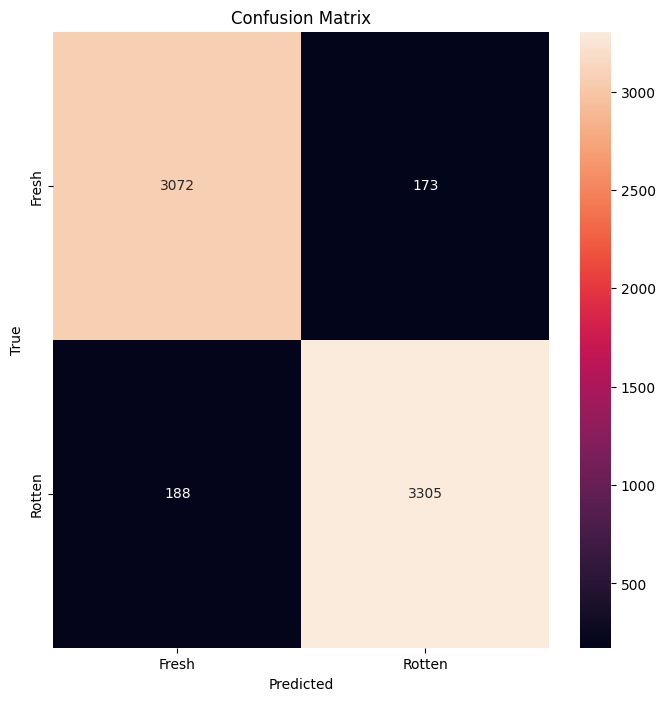

In [148]:
cm = confusion_matrix(y_true=y_true, y_pred=y_pred)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Fine-tuning model

In [57]:
model = load_model('XCeption.keras')
history = pkl.load(open('XCeption_history.pkl', 'rb'))

In [58]:
# Unfreeze layers
for layer in model.layers[:-5]:
    layer.trainable = True

adam_tuned = Adam(learning_rate=0.00002, beta_1=0.9, beta_2=0.999, decay=0.0, amsgrad=False)  # lower the learning rate
model.compile(optimizer=adam_tuned,
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

pd.set_option('max_colwidth', None)
layers = [(layer, layer.name, layer.trainable) for layer in model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

e:\LapTrinh\PROJECT\ML\.venv\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Layer Type        Layer Name  \
0             <InputLayer name=input_layer_16, built=True>    input_layer_16   
1                   <Conv2D name=block1_conv1, built=True>      block1_conv1   
2    <BatchNormalization name=block1_conv1_bn, built=True>   block1_conv1_bn   
3           <Activation name=block1_conv1_act, built=True>  block1_conv1_act   
4                   <Conv2D name=block1_conv2, built=True>      block1_conv2   
..                                                     ...               ...   
133                      <Dense name=dense_24, built=True>          dense_24   
134                  <Dropout name=dropout_16, built=True>        dropout_16   
135                      <Dense name=dense_25, built=True>          dense_25   
136                  <Dropout name=dropout_17, built=True>        dropout_17   
137                      <Dense name=dense_26, built=True>          dense_26   

     Layer Trainable  
0               True  
1               True  
2               True  
3               True  
4               True  
..               ...  
133             True  
134             True  
135             True  
136             True  
137             True  

[138 rows x 3 columns]

e:\LapTrinh\PROJECT\ML\.venv\Lib\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


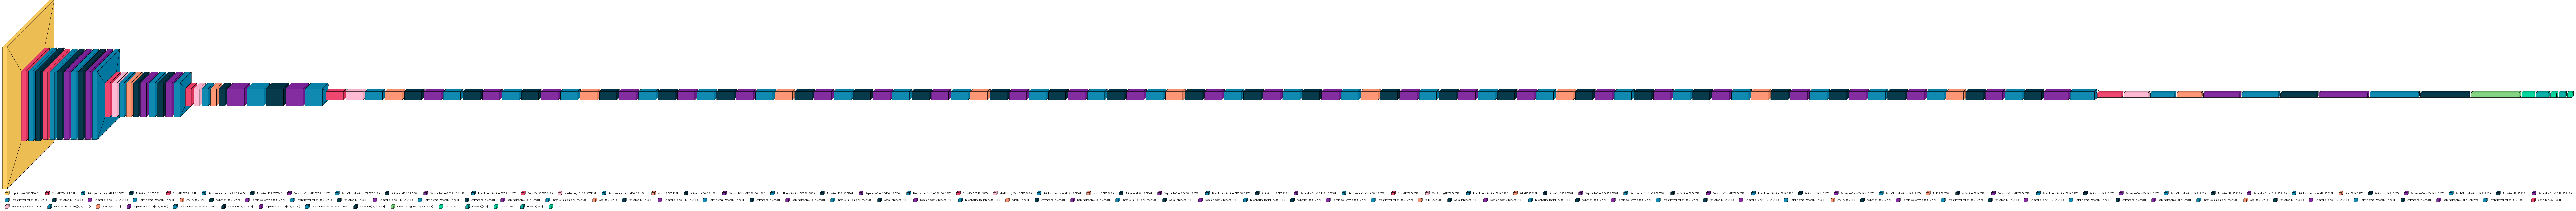

In [59]:
vk.layered_view(model, legend=True, show_dimension=True)

In [60]:
history = model.fit(
    train_generator,
    steps_per_epoch=int(train_len/32),
    epochs=3,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=int(val_len/32)
)

Epoch 1/3
494/494 ━━━━━━━━━━━━━━━━━━━━ 1285s 3s/step - accuracy: 0.9087 - auc: 0.9669 - loss: 0.6637 - val_accuracy: 0.9699 - val_auc: 0.9958 - val_loss: 0.5024
Epoch 2/3
494/494 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 1.0000 - auc: 1.0000 - loss: 0.4631 - val_accuracy: 1.0000 - val_auc: 1.0000 - val_loss: 0.4989


E:\Stuff\Python\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


Epoch 3/3
494/494 ━━━━━━━━━━━━━━━━━━━━ 1130s 2s/step - accuracy: 0.9596 - auc: 0.9928 - loss: 0.5213 - val_accuracy: 0.9801 - val_auc: 0.9980 - val_loss: 0.4608


In [61]:
results = model.evaluate(test_generator, steps=nb_samples, verbose=1)

loss = results[0]
acc = results[1] 
print('accuracy test: ',acc)
print('loss test: ',loss)

6738/6738 ━━━━━━━━━━━━━━━━━━━━ 139s 21ms/step - accuracy: 0.9778 - auc: 0.5167 - loss: 0.4694
accuracy test:  0.9747699499130249
loss test:  0.47611004114151


<Figure size 640x480 with 0 Axes>

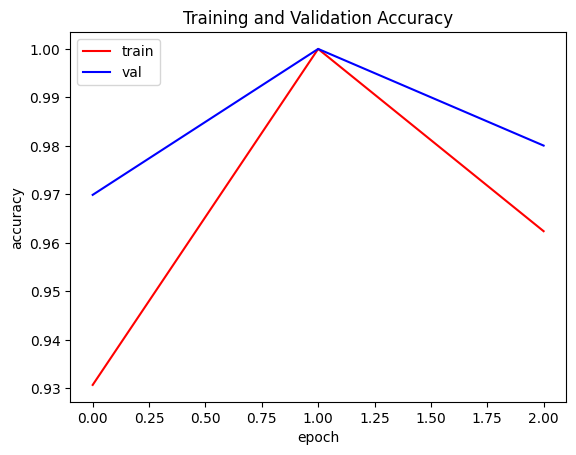

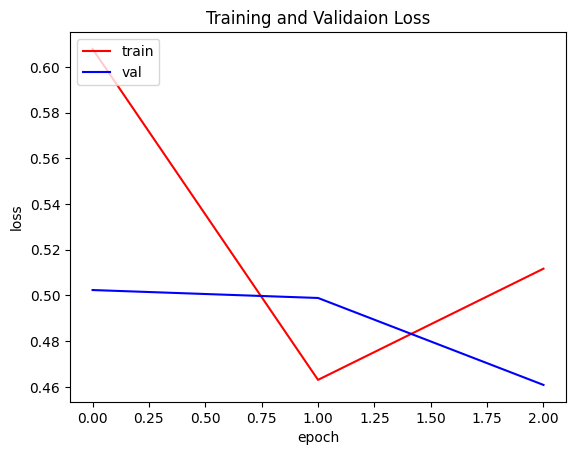

<Figure size 640x480 with 0 Axes>

In [62]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validaion Loss')
plt.figure()

In [63]:
predictions = model.predict(test_generator, steps=nb_samples, verbose=1)
y_pred = predictions > 0.5
y_true = test_generator.classes

6738/6738 ━━━━━━━━━━━━━━━━━━━━ 141s 21ms/step


In [64]:
labels = ['Fresh', 'Rotten']
print(classification_report(y_true, y_pred, target_names=labels))

print('accuracy score: ', accuracy_score(y_true, y_pred))
print('recall score: ', recall_score(y_true, y_pred))
print('precision score: ', precision_score(y_true, y_pred))
print('f1 score: ', f1_score(y_true, y_pred))

              precision    recall  f1-score   support

       Fresh       0.97      0.97      0.97      3245
      Rotten       0.97      0.98      0.98      3493

    accuracy                           0.97      6738
   macro avg       0.97      0.97      0.97      6738
weighted avg       0.97      0.97      0.97      6738

accuracy score:  0.9747699614128822
recall score:  0.9765244775264815
precision score:  0.9748499571306087
f1 score:  0.9756864988558352


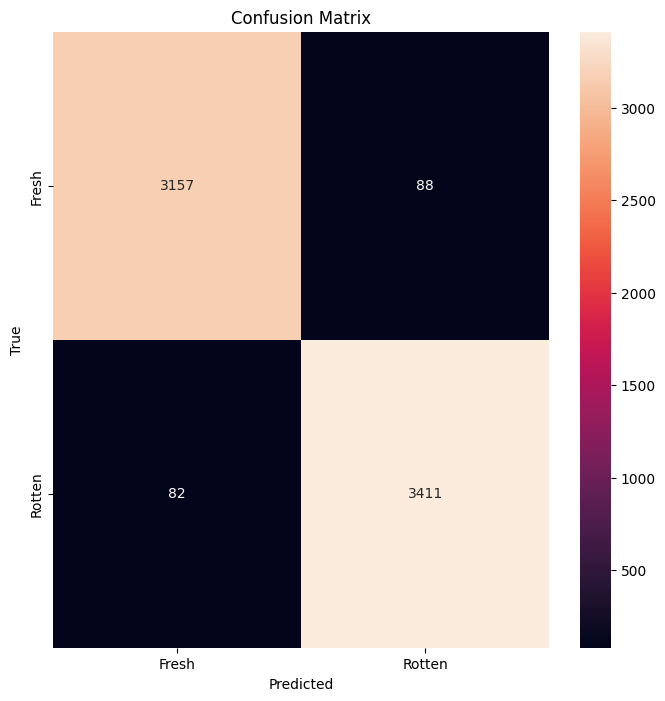

In [65]:
cm = confusion_matrix(y_true=y_true, y_pred=y_pred)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Demo

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 792ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


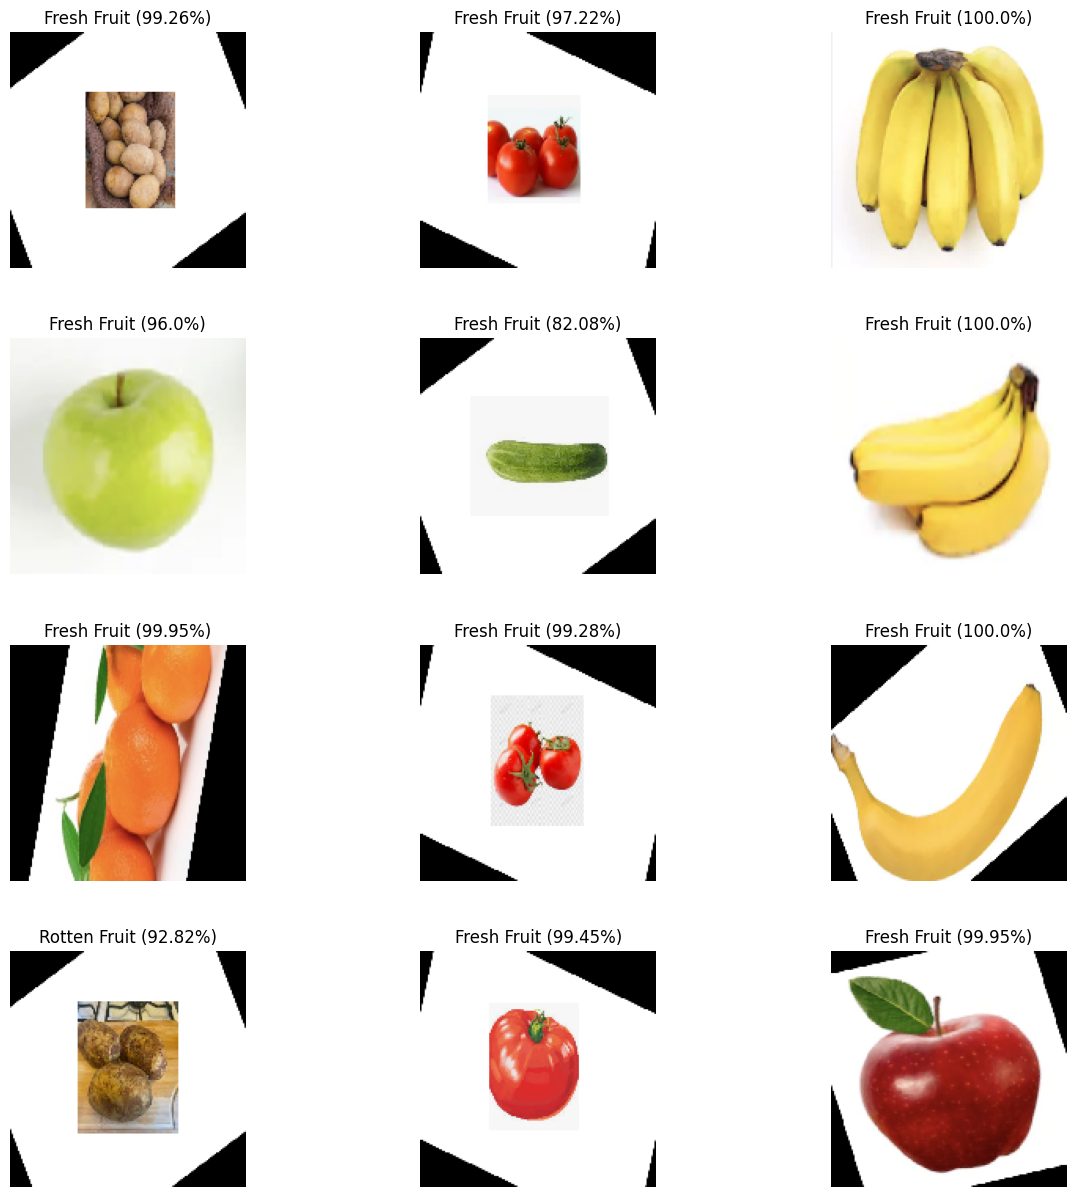

In [132]:
model_predict = load_model('XCeption.keras')

def predict_fruit(filepath):
    img = image.load_img(filepath, color_mode="rgb", target_size=(150, 150), interpolation="nearest")
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    prediction = model_predict.predict(img_array)[0][0]
    label = 'Fresh Fruit' if prediction < 0.5 else 'Rotten Fruit'
    confidence = (1.0 - prediction) if label == 'Fresh Fruit' else prediction
    return label, round(confidence * 100, 2)

#load 10 random image
plt.figure(figsize=(15, 15))
for i in range(1, 13):
    img_path = random.choice(os.listdir('tmp/fruit-dataset/test/Fresh Fruit/'))
    img_path = os.path.join('tmp/fruit-dataset/test/Fresh Fruit/', img_path)
    label, confidence = predict_fruit(img_path)
    plt.subplot(4, 3, i)
    plt.subplots_adjust(hspace=0.3)
    plt.imshow(image.load_img(img_path, color_mode="rgb", target_size=(150, 150), interpolation="nearest"))
    plt.title(f'{label} ({confidence}%)')
    plt.axis('off')
plt.show()